In [1]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import io
import os
from scipy.stats import mannwhitneyu

In [2]:
def read_vcf(path):
    with open(path, 'r') as f:
        lines = [l for l in f if not l.startswith('##')]
    return pd.read_csv(
        io.StringIO(''.join(lines)),
        dtype={'#CHROM': str, 'POS': int, 'ID': str, 'REF': str, 'ALT': str,
               'QUAL': str, 'FILTER': str, 'INFO': str},
        sep='\t'
    ).rename(columns={'#CHROM': 'CHROM'})

In [3]:
pangenie_svs_sample = read_vcf("pangenie/svs/26samples/directory/pangenie_merged_bi_nosnvs_26sample.vcf")

In [4]:
pangenie_svs_sample.shape

(1129810, 35)

In [5]:
# pd.set_option("display.max_columns", None)
# pd.set_option("display.max_rows", None)

In [6]:
pangenie_svs_sample[['INFO_ID']] = pangenie_svs_sample['INFO'].str.split(';', expand=True)[2]
pangenie_svs_sample['INFO_ID'] = pangenie_svs_sample['INFO_ID'].str.lstrip('ID=')

In [7]:
pangenie_DEL_sample = pangenie_svs_sample[pangenie_svs_sample['INFO_ID'].str.contains('DEL')]
#pangenie_DEL_sample.to_csv('pangenie/svs/26samples/directory/pangenie_allDEL_sample.csv', index = False, sep='\t', header=True)

In [8]:
pangenie_INS_sample = pangenie_svs_sample[pangenie_svs_sample['INFO_ID'].str.contains('INS')]
#pangenie_INS_sample.to_csv('pangenie/svs/26samples/directory/pangenie_allINS_sample.csv', index = False, sep='\t', header=True)

In [ ]:
## deletions

In [9]:
pangenie_DEL_sample_new = pangenie_DEL_sample[[
 'CHROM','FILTER', 'INFO_ID', 'FORMAT', 'HG01114','HG03065','HG01505','HG02492','HG00096','HG03732','HG01573','NA20509','HG02587','HG01596','NA19983','HG00864','HG02011','HG00733','HG03371','NA19036','NA20847','HG00171','NA18534','NA18939','HG03683','NA19240','HG03009','HG02018','HG00514','NA19650'
     ]]

##### removed NA12329

In [33]:
for col in pangenie_DEL_sample_new.iloc[:, 4:]:
    pangenie_DEL_sample_new[col] = pangenie_DEL_sample_new[col].str[:3]

In [34]:
for col in pangenie_DEL_sample_new.columns:
    pangenie_DEL_sample_new.loc[pangenie_DEL_sample_new[col].astype(str).str.startswith('0/0'), col] = '0'
    pangenie_DEL_sample_new.loc[pangenie_DEL_sample_new[col].astype(str).str.startswith('.:.'), col] = '0'
    pangenie_DEL_sample_new.loc[pangenie_DEL_sample_new[col].astype(str).str.startswith('0/1'), col] = '1'
    pangenie_DEL_sample_new.loc[pangenie_DEL_sample_new[col].astype(str).str.startswith('1/0'), col] = '1'
    pangenie_DEL_sample_new.loc[pangenie_DEL_sample_new[col].astype(str).str.startswith('1/1'), col] = '1'

In [35]:
pangenie_DEL_sample_new.iloc[:,4: ] = pangenie_DEL_sample_new.iloc[:,4: ].astype(str).astype(int)
pangenie_DEL_sample_new['Sum']=pangenie_DEL_sample_new.iloc[:,4: ].sum(axis=1)
pangenie_DEL_sample_new_atleast3 = pangenie_DEL_sample_new[pangenie_DEL_sample_new['Sum'] >= 3]

In [36]:
pangenie_DEL_sample_new_atleast3['START_POS'] = pangenie_DEL_sample_new_atleast3['INFO_ID'].str.split('-', expand=True)[1]
pangenie_DEL_sample_new_atleast3['TYPE'] = pangenie_DEL_sample_new_atleast3['INFO_ID'].str.split('-', expand=True)[2]
pangenie_DEL_sample_new_atleast3['LEN'] = pangenie_DEL_sample_new_atleast3['INFO_ID'].str.split('-', expand=True)[3]
pangenie_DEL_sample_new_atleast3.shape

In [37]:
pangenie_DEL_sample_new_atleast3.iloc[:,[31,33]] = pangenie_DEL_sample_new_atleast3.iloc[:,[31,33]].astype(str).astype(int)
# VCF files in fact are providing a single 1-based position for a variant, end = start + len -1
pangenie_DEL_sample_new_atleast3['END_POS'] = pangenie_DEL_sample_new_atleast3['START_POS'] + pangenie_DEL_sample_new_atleast3['LEN']-1
pangenie_DEL_sample_new_atleast3_new = pangenie_DEL_sample_new_atleast3[[
'CHROM', 'START_POS','END_POS', 'TYPE','LEN', 'FILTER', 'INFO_ID', 'FORMAT', 'HG01114','HG03065','HG01505','HG02492','HG00096','HG03732','HG01573','NA20509','HG02587','HG01596','NA19983','HG00864','HG02011','HG00733','HG03371','NA19036','NA20847','HG00171','NA18534','NA18939','HG03683','NA19240','HG03009','HG02018','HG00514','NA19650', 'Sum'
    ]]

In [16]:
pangenie_DEL_sample_new_atleast3_50 = pangenie_DEL_sample_new_atleast3_new[pangenie_DEL_sample_new_atleast3_new['LEN'] >= 50]
pangenie_DEL_sample_new_atleast3_50.shape

(16240, 35)

In [17]:
pangenie_DEL_sample_new_atleast3_50_zero = pangenie_DEL_sample_new_atleast3_50[pangenie_DEL_sample_new_atleast3_50.iloc[:, 8:].eq(0).any(1)]

In [18]:
pangenie_DEL_sample_new_atleast3_50_zero

,CHROM,START_POS,END_POS,TYPE,LEN,FILTER,INFO_ID,FORMAT,HG01114,HG03065,...,HG00171,NA18534,NA18939,HG03683,NA19240,HG03009,HG02018,HG00514,NA19650,Sum
55,chr1,872670,872879,DEL,210,PASS,chr1-872670-DEL-210,GT:GQ,0,1,...,0,0,0,0,0,0,0,0,0,5.0
75,chr1,904479,904576,DEL,98,PASS,chr1-904479-DEL-98,GT:GQ,0,1,...,1,1,1,0,1,0,1,1,1,18.0
87,chr1,909170,909480,DEL,311,PASS,chr1-909170-DEL-311,GT:GQ,1,1,...,1,1,1,1,1,1,1,0,1,24.0
89,chr1,909346,909526,DEL,181,PASS,chr1-909346-DEL-181,GT:GQ,0,0,...,1,0,0,0,0,0,0,1,0,5.0
120,chr1,936235,936312,DEL,78,PASS,chr1-936235-DEL-78,GT:GQ,0,1,...,0,0,1,1,0,1,0,0,0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129684,chrX,155137212,155137304,DEL,93,PASS,chrX-155137212-DEL-93,GT:GQ,1,0,...,1,1,1,1,0,1,1,1,0,17.0
1129722,chrX,155370584,155370951,DEL,368,PASS,chrX-155370584-DEL-368,GT:GQ,1,0,...,0,0,0,0,0,0,0,0,1,9.0
1129771,chrX,155560528,155573602,DEL,13075,PASS,chrX-155560528-DEL-13075,GT:GQ,0,1,...,1,1,1,1,0,1,1,1,0,15.0
1129800,chrX,155688800,155689333,DEL,534,PASS,chrX-155688800-DEL-534,GT:GQ,1,0,...,0,0,0,0,0,0,0,0,1,11.0


In [19]:
#pangenie_DEL_sample_new_atleast3_50_zero.to_csv('pangenie/svs/26samples/directory/pangenie_svs_26sample_ALL_DEL_atleast3_50_genotype_only01.bed', index = False, sep='\t', header=True)

In [20]:
pangenie_DEL_sample_new_atleast3_50_start_end = pangenie_DEL_sample_new_atleast3_50_zero[['CHROM', 'START_POS', 'END_POS', 'INFO_ID']]
pangenie_DEL_sample_new_atleast3_50_start_end.shape

(15034, 4)

In [21]:
#pangenie_DEL_sample_new_atleast3_50_start_end.to_csv('pangenie/svs/26samples/directory/pangenie_svs_26sample_ALL_DEL_atleast3_50_only01.bed', index = False, sep='\t', header=True)

In [ ]:
## insertions

In [22]:
pangenie_INS_sample_new = pangenie_INS_sample[[
 'CHROM','FILTER', 'INFO_ID', 'FORMAT', 'HG01114','HG03065','HG01505','HG02492','HG00096','HG03732','HG01573','NA20509','HG02587','HG01596','NA19983','HG00864','HG02011','HG00733','HG03371','NA19036','NA20847','HG00171','NA18534','NA18939','HG03683','NA19240','HG03009','HG02018','HG00514','NA19650'
     ]]

##### removed NA12329

In [39]:
for col in pangenie_INS_sample_new.iloc[:, 4:]:
    pangenie_INS_sample_new[col] = pangenie_INS_sample_new[col].str[:3]

In [40]:
for col in pangenie_INS_sample_new.columns:
    pangenie_INS_sample_new.loc[pangenie_INS_sample_new[col].astype(str).str.startswith('0/0'), col] = '0'
    pangenie_INS_sample_new.loc[pangenie_INS_sample_new[col].astype(str).str.startswith('.:.'), col] = '0'
    pangenie_INS_sample_new.loc[pangenie_INS_sample_new[col].astype(str).str.startswith('0/1'), col] = '1'
    pangenie_INS_sample_new.loc[pangenie_INS_sample_new[col].astype(str).str.startswith('1/0'), col] = '1'
    pangenie_INS_sample_new.loc[pangenie_INS_sample_new[col].astype(str).str.startswith('1/1'), col] = '1'

In [41]:
pangenie_INS_sample_new

,CHROM,FILTER,INFO_ID,FORMAT,HG01114,HG03065,HG01505,HG02492,HG00096,HG03732,...,HG00171,NA18534,NA18939,HG03683,NA19240,HG03009,HG02018,HG00514,NA19650,Sum
1,chr1,PASS,chr1-814550-INS-99,GT:GQ,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,1,7.0
2,chr1,PASS,chr1-814683-INS-1,GT:GQ,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,26.0
7,chr1,PASS,chr1-820880-INS-245,GT:GQ,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,25.0
12,chr1,PASS,chr1-826578-INS-1,GT:GQ,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,25.0
16,chr1,PASS,chr1-830609-INS-1,GT:GQ,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129794,chrX,PASS,chrX-155659105-INS-4,GT:GQ,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,8.0
1129798,chrX,PASS,chrX-155685563-INS-1,GT:GQ,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,26.0
1129799,chrX,PASS,chrX-155688795-INS-23,GT:GQ,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1129807,chrX,PASS,chrX-155700614-INS-55,GT:GQ,1,0,1,1,1,0,...,1,0,0,0,1,0,1,0,1,14.0


In [42]:
pangenie_INS_sample_new.iloc[:,4: ] = pangenie_INS_sample_new.iloc[:,4: ].astype(str).astype(int)
pangenie_INS_sample_new['Sum']=pangenie_INS_sample_new.iloc[:,4: ].sum(axis=1)
pangenie_INS_sample_new_atleast3 = pangenie_INS_sample_new[pangenie_INS_sample_new['Sum'] >= 3]
pangenie_INS_sample_new_atleast3.shape

In [43]:
pangenie_INS_sample_new_atleast3['START_POS'] = pangenie_INS_sample_new_atleast3['INFO_ID'].str.split('-', expand=True)[1]
pangenie_INS_sample_new_atleast3['TYPE'] = pangenie_INS_sample_new_atleast3['INFO_ID'].str.split('-', expand=True)[2]
pangenie_INS_sample_new_atleast3['LEN'] = pangenie_INS_sample_new_atleast3['INFO_ID'].str.split('-', expand=True)[3]
pangenie_INS_sample_new_atleast3.iloc[:,[31,33]] = pangenie_INS_sample_new_atleast3.iloc[:,[31,33]].astype(str).astype(int)
pangenie_INS_sample_new_atleast3['END_POS'] = pangenie_INS_sample_new_atleast3['START_POS']

In [28]:
pangenie_INS_sample_new_atleast3_new = pangenie_INS_sample_new_atleast3[[
'CHROM', 'START_POS','END_POS', 'TYPE','LEN', 'FILTER', 'INFO_ID', 'FORMAT', 'HG01114','HG03065','HG01505','HG02492','HG00096','HG03732','HG01573','NA20509','HG02587','HG01596','NA19983','HG00864','HG02011','HG00733','HG03371','NA19036','NA20847','HG00171','NA18534','NA18939','HG03683','NA19240','HG03009','HG02018','HG00514','NA19650', 'Sum'
    ]]

In [29]:
pangenie_INS_sample_new_atleast3_50 = pangenie_INS_sample_new_atleast3_new[pangenie_INS_sample_new_atleast3_new['LEN'] >= 50]
pangenie_INS_sample_new_atleast3_50.shape

(24231, 35)

In [30]:
pangenie_INS_sample_new_atleast3_50_zero = pangenie_INS_sample_new_atleast3_50[pangenie_INS_sample_new_atleast3_50.iloc[:, 8:].eq(0).any(1)]
pangenie_INS_sample_new_atleast3_50_zero.shape

(21518, 35)

In [31]:
#pangenie_INS_sample_new_atleast3_50_zero.to_csv('pangenie/svs/26samples/directory/pangenie_svs_26sample_ALL_INS_atleast3_50_genotype_only01.bed', index = False, sep='\t', header=True)

In [32]:
pangenie_INS_sample_new_atleast3_50_start_end = pangenie_INS_sample_new_atleast3_50_zero[['CHROM', 'START_POS', 'END_POS', 'INFO_ID']]
pangenie_INS_sample_new_atleast3_50_start_end.shape

(21518, 4)

In [417]:
#pangenie_INS_sample_new_atleast3_50_start_end.to_csv('pangenie/svs/26samples/directory/pangenie_svs_26sample_ALL_INS_atleast3_50_only01.bed', index = False, sep='\t', header=True)

## SVs' impact on boundary strength

In [418]:
all_DEL_merged = pd.read_csv('deletion/overlapped/boundaries/directory/all_DEL_26merged_cutoff_flank_inter30_5kb_boundaries_100kb_only01.bed', sep='\t', header=None)
all_DEL_merged.columns =['CHROM', 'START_POS', 'END_POS', 'INFO_ID', 'BOUND_CHR', 'FLANK_START', 'FLANK_END', 'BOUND_SCORE']

In [419]:
all_DEL_merged.shape

(15287, 8)

In [420]:
all_INS_merged = pd.read_csv('insertion/overlapped/boundaries/directory/all_INS_26merged_cutoff_flank_inter30_5kb_boundaries_100kb_only01.bed', sep='\t', header=None)
all_INS_merged.columns =['CHROM', 'START_POS', 'END_POS', 'INFO_ID', 'BOUND_CHR', 'FLANK_START', 'FLANK_END', 'BOUND_SCORE']

In [421]:
all_INS_merged.shape

(21806, 8)

In [422]:
all_DEL_boundary_1 = all_DEL_merged.loc[all_DEL_merged.iloc[:, 4] != '.']
all_DEL_boundary_2 = all_DEL_boundary_1.reset_index(drop=True)

In [423]:
all_DEL_boundary_2

,CHROM,START_POS,END_POS,INFO_ID,BOUND_CHR,FLANK_START,FLANK_END,BOUND_SCORE
0,chr1,872670,872879,chr1-872670-DEL-210,chr1,840001,895000,0.3857139050960541
1,chr1,964576,964764,chr1-964576-DEL-189,chr1,950001,1005000,0.6052700281143188
2,chr1,964632,964706,chr1-964632-DEL-75,chr1,950001,1005000,0.6052700281143188
3,chr1,976738,977055,chr1-976738-DEL-318,chr1,950001,1005000,0.6052700281143188
4,chr1,977944,978002,chr1-977944-DEL-59,chr1,950001,1005000,0.6052700281143188
...,...,...,...,...,...,...,...,...
4788,chr9,137866661,137866746,chr9-137866661-DEL-86,chr9,137840001,137895000,0.3431273400783539
4789,chr9,137874393,137874470,chr9-137874393-DEL-78,chr9,137830001,137885000,0.3431273400783539
4790,chr9,137874393,137874470,chr9-137874393-DEL-78,chr9,137840001,137895000,0.3431273400783539
4791,chr9,138113751,138113882,chr9-138113751-DEL-132,chr9,138105001,138160000,0.363037496805191


In [424]:
all_DEL_boundary_2[all_DEL_boundary_2['INFO_ID'] == 'chr8-39374555-DEL-155154']

,CHROM,START_POS,END_POS,INFO_ID,BOUND_CHR,FLANK_START,FLANK_END,BOUND_SCORE
4458,chr8,39374555,39529708,chr8-39374555-DEL-155154,chr8,39335001,39390000,0.2683387100696563
4459,chr8,39374555,39529708,chr8-39374555-DEL-155154,chr8,39505001,39560000,0.2870880365371704


In [425]:
all_INS_boundary_1 = all_INS_merged.loc[all_INS_merged.iloc[:, 4] != '.']
all_INS_boundary_2 = all_INS_boundary_1.reset_index(drop=True)

In [426]:
all_INS_boundary_2

,CHROM,START_POS,END_POS,INFO_ID,BOUND_CHR,FLANK_START,FLANK_END,BOUND_SCORE
0,chr1,866852,866852,chr1-866852-INS-98,chr1,840001,895000,0.3857139050960541
1,chr1,868471,868471,chr1-868471-INS-2555,chr1,840001,895000,0.3857139050960541
2,chr1,872567,872567,chr1-872567-INS-420,chr1,840001,895000,0.3857139050960541
3,chr1,876015,876015,chr1-876015-INS-807,chr1,840001,895000,0.3857139050960541
4,chr1,876025,876025,chr1-876025-INS-2312,chr1,840001,895000,0.3857139050960541
...,...,...,...,...,...,...,...,...
6855,chr9,137853545,137853545,chr9-137853545-INS-50,chr9,137840001,137895000,0.3431273400783539
6856,chr9,137874649,137874649,chr9-137874649-INS-78,chr9,137830001,137885000,0.3431273400783539
6857,chr9,137874649,137874649,chr9-137874649-INS-78,chr9,137840001,137895000,0.3431273400783539
6858,chr9,137888963,137888963,chr9-137888963-INS-118,chr9,137840001,137895000,0.3431273400783539


In [227]:
sample_merged_BS = pd.read_csv('sample/boundaryscore/directory/BS_cutoff_inter30_10kb.boundaries_100kb.bed', sep='\t', header=None)
sample_merged_BS =sample_merged_BS[[0, 1, 2, 3, 4, 5, 6, 8]]
sample_merged_BS.columns =['BOUND_CHR', 'FLANK_START', 'FLANK_END', 'BOUND_SCORE','BOUND_CHR_samp', 'BOUND_START_samp', 'BOUND_END_samp', 'BOUND_SCORE_samp']
sample_merged_BS_1 = sample_merged_BS.groupby(['BOUND_CHR', 'FLANK_START', 'FLANK_END'], as_index=False)['BOUND_SCORE_samp'].median()
all_INS_boundary_2['HG03732'] = all_INS_boundary_2.merge(sample_merged_BS_1, how="left", left_on=["BOUND_CHR", "FLANK_START", "FLANK_END"], right_on=["BOUND_CHR", "FLANK_START", "FLANK_END"])['BOUND_SCORE_samp']
all_DEL_boundary_2['HG03732'] = all_DEL_boundary_2.merge(sample_merged_BS_1, how="left", left_on=["BOUND_CHR", "FLANK_START", "FLANK_END"], right_on=["BOUND_CHR", "FLANK_START", "FLANK_END"])['BOUND_SCORE_samp']

In [228]:
all_INS_boundary_2

,CHROM,START_POS,END_POS,INFO_ID,BOUND_CHR,FLANK_START,FLANK_END,BOUND_SCORE,GM18534,GM18939,...,HG01596,HG02011,HG02018,HG02492,HG02587,HG03009,HG03065,HG03371,HG03683,HG03732
0,chr1,866852,866853,chr1-866852-INS-98,chr1,840001,895000,0.3857139050960541,NaN,NaN,...,0.996942,0.787516,0.514748,0.748621,1.578724,0.548503,1.163384,0.496668,0.653586,1.259102
1,chr1,868471,868472,chr1-868471-INS-2555,chr1,840001,895000,0.3857139050960541,NaN,NaN,...,0.996942,0.787516,0.514748,0.748621,1.578724,0.548503,1.163384,0.496668,0.653586,1.259102
2,chr1,872567,872568,chr1-872567-INS-420,chr1,840001,895000,0.3857139050960541,NaN,NaN,...,0.996942,0.787516,0.514748,0.748621,1.578724,0.548503,1.163384,0.496668,0.653586,1.259102
3,chr1,876015,876016,chr1-876015-INS-807,chr1,840001,895000,0.3857139050960541,NaN,NaN,...,0.996942,0.787516,0.514748,0.748621,1.578724,0.548503,1.163384,0.496668,0.653586,1.259102
4,chr1,876025,876026,chr1-876025-INS-2312,chr1,840001,895000,0.3857139050960541,NaN,NaN,...,0.996942,0.787516,0.514748,0.748621,1.578724,0.548503,1.163384,0.496668,0.653586,1.259102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6855,chr9,137853545,137853546,chr9-137853545-INS-50,chr9,137840001,137895000,0.3431273400783539,0.201470,0.272485,...,0.618370,0.633099,NaN,1.078382,0.292997,0.658104,1.048833,0.633260,NaN,0.568201
6856,chr9,137874649,137874650,chr9-137874649-INS-78,chr9,137830001,137885000,0.3431273400783539,0.201470,0.272485,...,0.618370,0.633099,NaN,1.078382,0.292997,0.658104,1.048833,0.633260,NaN,0.568201
6857,chr9,137874649,137874650,chr9-137874649-INS-78,chr9,137840001,137895000,0.3431273400783539,0.201470,0.272485,...,0.618370,0.633099,NaN,1.078382,0.292997,0.658104,1.048833,0.633260,NaN,0.568201
6858,chr9,137888963,137888964,chr9-137888963-INS-118,chr9,137840001,137895000,0.3431273400783539,0.201470,0.272485,...,0.618370,0.633099,NaN,1.078382,0.292997,0.658104,1.048833,0.633260,NaN,0.568201


In [229]:
all_DEL_boundary_2

,CHROM,START_POS,END_POS,INFO_ID,BOUND_CHR,FLANK_START,FLANK_END,BOUND_SCORE,GM18534,GM18939,...,HG01596,HG02011,HG02018,HG02492,HG02587,HG03009,HG03065,HG03371,HG03683,HG03732
0,chr1,872670,872879,chr1-872670-DEL-210,chr1,840001,895000,0.3857139050960541,NaN,NaN,...,0.996942,0.787516,0.514748,0.748621,1.578724,0.548503,1.163384,0.496668,0.653586,1.259102
1,chr1,964576,964764,chr1-964576-DEL-189,chr1,950001,1005000,0.6052700281143188,1.296450,0.764313,...,0.900502,1.292665,1.522593,1.216512,1.576817,0.772804,1.101057,0.878213,0.845969,0.627010
2,chr1,964632,964706,chr1-964632-DEL-75,chr1,950001,1005000,0.6052700281143188,1.296450,0.764313,...,0.900502,1.292665,1.522593,1.216512,1.576817,0.772804,1.101057,0.878213,0.845969,0.627010
3,chr1,976738,977055,chr1-976738-DEL-318,chr1,950001,1005000,0.6052700281143188,1.296450,0.764313,...,0.900502,1.292665,1.522593,1.216512,1.576817,0.772804,1.101057,0.878213,0.845969,0.627010
4,chr1,977944,978002,chr1-977944-DEL-59,chr1,950001,1005000,0.6052700281143188,1.296450,0.764313,...,0.900502,1.292665,1.522593,1.216512,1.576817,0.772804,1.101057,0.878213,0.845969,0.627010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4788,chr9,137866661,137866746,chr9-137866661-DEL-86,chr9,137840001,137895000,0.3431273400783539,0.201470,0.272485,...,0.618370,0.633099,NaN,1.078382,0.292997,0.658104,1.048833,0.633260,NaN,0.568201
4789,chr9,137874393,137874470,chr9-137874393-DEL-78,chr9,137830001,137885000,0.3431273400783539,0.201470,0.272485,...,0.618370,0.633099,NaN,1.078382,0.292997,0.658104,1.048833,0.633260,NaN,0.568201
4790,chr9,137874393,137874470,chr9-137874393-DEL-78,chr9,137840001,137895000,0.3431273400783539,0.201470,0.272485,...,0.618370,0.633099,NaN,1.078382,0.292997,0.658104,1.048833,0.633260,NaN,0.568201
4791,chr9,138113751,138113882,chr9-138113751-DEL-132,chr9,138105001,138160000,0.363037496805191,1.022963,0.680711,...,0.968240,0.772438,NaN,1.020497,1.149689,1.572460,NaN,0.979381,0.674705,0.703455


In [230]:
#all_INS_boundary_2.to_csv('directory/all_INS_merged_BS_flank_26sample_only01.bed', index = False, sep='\t', header=True)
#all_DEL_boundary_2.to_csv('/directory/all_DEL_merged_BS_flank_26sample_only01.bed', index = False, sep='\t', header=True)

#### Mann-Whitney U test for genotypes and boundary BS

In [264]:
# Replace NaN Values with Zeros, because those NA boundary scores mean there is no boundary, so we can changed them to zero
all_DEL_boundary_3 = all_DEL_boundary_2.fillna(0).drop_duplicates()
all_DEL_boundary_3.shape

In [235]:
# Replace NaN Values with Zeros
all_INS_boundary_3 = all_INS_boundary_2.fillna(0).drop_duplicates()
all_INS_boundary_3.shape

In [238]:
all_DEL_boundary_id = list(all_DEL_boundary_3['INFO_ID'])
DEL_list = list(set(all_DEL_boundary_id))
len(DEL_list)

In [241]:
all_INS_boundary_id = list(all_INS_boundary_3['INFO_ID'])
INS_list = list(set(all_INS_boundary_id))
len(INS_list)

In [278]:
DEL_genotype = pd.read_csv('directory/pangenie_svs_26sample_ALL_DEL_atleast3_50_genotype_only01.bed', sep='\t', header=0)
INS_genotype = pd.read_csv('directory/pangenie_svs_26sample_ALL_INS_atleast3_50_genotype_only01.bed', sep='\t', header=0)

In [247]:
DEL_genotype_1 = DEL_genotype.iloc[:, :-1]
INS_genotype_1 = INS_genotype.iloc[:, :-1]
DEL_boundary_genotype = DEL_genotype_1[DEL_genotype_1['INFO_ID'].isin(all_DEL_boundary_id)]
INS_boundary_genotype = INS_genotype_1[INS_genotype_1['INFO_ID'].isin(all_INS_boundary_id)]

In [250]:
DEL_boundary_genotype = DEL_boundary_genotype[[
'CHROM', 'START_POS', 'END_POS', 'TYPE', 'LEN', 'FILTER', 'INFO_ID','FORMAT','NA18534','NA18939','NA19036','NA19240','NA19650','NA19983','NA20509','NA20847','HG00096','HG00171','HG00514','HG00733','HG00864','HG01114','HG01505','HG01573','HG01596','HG02011','HG02018','HG02492','HG02587','HG03009','HG03065','HG03371','HG03683','HG03732'
    ]]
INS_boundary_genotype = INS_boundary_genotype[[
'CHROM', 'START_POS', 'END_POS', 'TYPE', 'LEN', 'FILTER', 'INFO_ID','FORMAT','NA18534','NA18939','NA19036','NA19240','NA19650','NA19983','NA20509','NA20847','HG00096','HG00171','HG00514','HG00733','HG00864','HG01114','HG01505','HG01573','HG01596','HG02011','HG02018','HG02492','HG02587','HG03009','HG03065','HG03371','HG03683','HG03732'
    ]]

In [251]:
DEL_boundary_genotype_1 = DEL_boundary_genotype.reset_index(drop=True)
DEL_boundary_genotype_1.shape

(4540, 34)

In [252]:
INS_boundary_genotype_1 = INS_boundary_genotype.reset_index(drop=True)
INS_boundary_genotype_1.shape

(6572, 34)

In [45]:
### test for genotypes 0 and 1 (binary genotypes, only 0/0 and others)
pvalue= []

for i in range(0, len(all_DEL_boundary_3)):
    DEL_boundary_genotype_all = DEL_boundary_genotype_1[DEL_boundary_genotype_1.loc[:,'INFO_ID'] == all_DEL_boundary_3.loc[i,'INFO_ID']].iloc[:,8:]
    genotypes_list = DEL_boundary_genotype_all.iloc[0].values.tolist()
    boundary_score_list = all_DEL_boundary_3.iloc[i,8:34].values.tolist()

    df = pd.DataFrame({'genotypes' : genotypes_list,
                   'boundary_score' : boundary_score_list})
    
    df_new = df.assign(BS=df.groupby('genotypes').cumcount()).pivot('BS','genotypes','boundary_score')
      
    try:
        U, p = mannwhitneyu(x=df_new[0].dropna().tolist(), y=df_new[1].dropna().tolist(), method="exact", alternative = 'two-sided')
        if p < 0.05:
            p = str(p) + '_sig'
        print (p)
        
    except ValueError:
        p = 'NA'
        print (p)
    
    pvalue.append(p)
    
all_DEL_boundary_3['pvalue_0_1'] = pvalue

In [55]:
#all_DEL_boundary_3

In [262]:
all_DEL_boundary_3.to_csv('directory/final_ALL_DEL_merged_BS_flank_26sample_pvalue_only01_fillna.bed', index = False, sep='\t', header=True)

In [46]:
### test for genotypes 0 and 1 (binary genotypes, only 0/0 and others)
pvalue= []

for i in range(0, len(all_INS_boundary_3)):
    INS_boundary_genotype_all = INS_boundary_genotype_1[INS_boundary_genotype_1.loc[:,'INFO_ID'] == all_INS_boundary_3.loc[i,'INFO_ID']].iloc[:,8:]
    genotypes_list = INS_boundary_genotype_all.iloc[0].values.tolist()
    boundary_score_list = all_INS_boundary_3.iloc[i,8:34].values.tolist()

    df = pd.DataFrame({'genotypes' : genotypes_list,
                   'boundary_score' : boundary_score_list})
    
    df_new = df.assign(BS=df.groupby('genotypes').cumcount()).pivot('BS','genotypes','boundary_score')
      
    try:
        U, p = mannwhitneyu(x=df_new[0].dropna().tolist(), y=df_new[1].dropna().tolist(), method="exact", alternative = 'two-sided')
        if p < 0.05:
            p = str(p) + '_sig'
        print (p)
        
    except ValueError:
        p = 'NA'
        print (p)
    
    pvalue.append(p)
    
all_INS_boundary_3['pvalue_0_1'] = pvalue

In [56]:
#all_INS_boundary_3

In [261]:
all_INS_boundary_3.to_csv('directory/final_ALL_INS_merged_BS_flank_26sample_pvalue_only01_fillna.bed', index = False, sep='\t', header=True)

In [ ]:
## visualization of chr6-130293639-INS-295

In [477]:
all_DEL_boundary_3.iloc[4389]
#all_INS_boundary_3.iloc[5686]

CHROM                          chr8
START_POS                    644401
END_POS                      649414
INFO_ID        chr8-644401-DEL-5014
BOUND_CHR                      chr8
FLANK_START                  590001
FLANK_END                    645000
BOUND_SCORE      0.2617068886756897
GM18534                    0.733518
GM18939                    0.417711
GM19036                    1.097635
GM19240                    0.396243
GM19650                         0.0
GM19833                         0.0
GM20509                    0.564573
GM20847                      0.5085
HG00096                    1.485679
HG00171                    0.659726
HG00514                     0.89639
HG00733                    0.468334
HG00864                    0.901458
HG01114                         0.0
HG01505                    0.601863
HG01573                    0.263052
HG01596                    0.687755
HG02011                    0.797682
HG02018                    0.389067
HG02492                    0

In [478]:
boundary_score_list = all_DEL_boundary_3.iloc[4389,8:34].values.tolist()
#boundary_score_list = all_INS_boundary_3.iloc[5686,8:34].values.tolist()
boundary_score_list

[0.733518123626709,
 0.4177114963531494,
 1.097635269165039,
 0.3962425887584686,
 0.0,
 0.0,
 0.5645726919174194,
 0.5085001587867737,
 1.4856786727905271,
 0.6597261428833008,
 0.8963896036148071,
 0.468334436416626,
 0.901457667350769,
 0.0,
 0.6018633246421814,
 0.2630515098571777,
 0.6877551078796387,
 0.7976818084716797,
 0.3890666961669922,
 0.997355341911316,
 1.3230451345443726,
 0.9535468816757202,
 1.064899444580078,
 0.6566665172576904,
 0.4962750077247619,
 0.5931228399276733]

In [479]:
DEL_boundary_genotype_1[DEL_boundary_genotype_1.loc[:,'INFO_ID'] == all_DEL_boundary_3.loc[4389,'INFO_ID']]
#INS_boundary_genotype_1[INS_boundary_genotype_1.loc[:,'INFO_ID'] == all_INS_boundary_3.loc[5686,'INFO_ID']]

,CHROM,START_POS,END_POS,TYPE,LEN,FILTER,INFO_ID,FORMAT,NA18534,NA18939,...,HG01596,HG02011,HG02018,HG02492,HG02587,HG03009,HG03065,HG03371,HG03683,HG03732
4160,chr8,644401,649414,DEL,5014,PASS,chr8-644401-DEL-5014,GT:GQ,0,1,...,1,0,1,1,0,1,0,1,1,1


In [480]:
DEL_boundary_genotype_all = DEL_boundary_genotype_1[DEL_boundary_genotype_1.loc[:,'INFO_ID'] == all_DEL_boundary_3.loc[4389,'INFO_ID']].iloc[:,8:]
genotypes_list = DEL_boundary_genotype_all.iloc[0].values.tolist()
# INS_boundary_genotype_all = INS_boundary_genotype_1[INS_boundary_genotype_1.loc[:,'INFO_ID'] == all_INS_boundary_3.loc[5686,'INFO_ID']].iloc[:,8:]
# genotypes_list = INS_boundary_genotype_all.iloc[0].values.tolist()

In [481]:
DEL_boundary_genotype_all
#INS_boundary_genotype_all

,NA18534,NA18939,NA19036,NA19240,NA19650,NA19983,NA20509,NA20847,HG00096,HG00171,...,HG01596,HG02011,HG02018,HG02492,HG02587,HG03009,HG03065,HG03371,HG03683,HG03732
4160,0,1,0,1,1,1,1,1,1,1,...,1,0,1,1,0,1,0,1,1,1


In [482]:
genotypes_list = DEL_boundary_genotype_all.iloc[0].values.tolist()
#genotypes_list = INS_boundary_genotype_all.iloc[0].values.tolist()
genotypes_list

[0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1]

In [488]:
df = pd.DataFrame({'genotypes' : genotypes_list,
                   'boundary_score' : boundary_score_list})  
df

,genotypes,boundary_score
0,0,0.733518
1,1,0.417711
2,0,1.097635
3,1,0.396243
4,1,0.000000
5,1,0.000000
6,1,0.564573
7,1,0.508500
8,1,1.485679
9,1,0.659726


In [489]:
df_new = df.assign(BS=df.groupby('genotypes').cumcount()).pivot('BS','genotypes','boundary_score')
df_new

genotypes,0,1
BS,,
0,0.733518,0.417711
1,1.097635,0.396243
2,0.797682,0.000000
3,1.323045,0.000000
4,1.064899,0.564573
5,NaN,0.508500
6,NaN,1.485679
7,NaN,0.659726
8,NaN,0.896390


Text(0.5, 1.0, 'chr8-644401-DEL-5014')

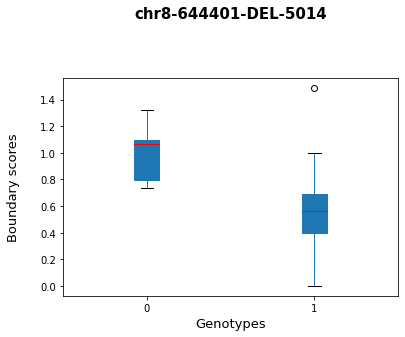

In [490]:
import matplotlib.pyplot as plt
fig = df_new.boxplot(column=[0, 1], grid=False, patch_artist = True, medianprops=dict(color='red'))
fig.set_ylabel('Boundary scores', fontsize = 13, labelpad=20)
fig.set_xlabel('Genotypes', fontsize=13)
fig.set_title('chr8-644401-DEL-5014', pad=60, fontsize = 15, fontweight = 'bold')

Text(0.5, 1.0, 'chr6-130293639-INS-295')

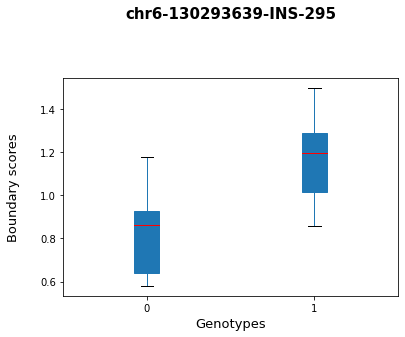

In [476]:
import matplotlib.pyplot as plt
fig = df_new.boxplot(column=[0, 1], grid=False, patch_artist = True, medianprops=dict(color='red'))
fig.set_ylabel('Boundary scores', fontsize = 13, labelpad=20)
fig.set_xlabel('Genotypes', fontsize=13)
fig.set_title('chr6-130293639-INS-295', pad=60, fontsize = 15, fontweight = 'bold')

## SVs' impact on gene expression levels

In [44]:
qtl = pd.read_csv('directory/qtl_results_all_v4_fdr0.05.txt', sep='\t')

In [268]:
qtl_DEL = qtl[qtl['type'] == 'DEL']
qtl_INS = qtl[qtl['type'] == 'INS']
qtl_DEL_snp_id = list(qtl_DEL['snp_id'])
qtl_INS_snp_id = list(qtl_INS['snp_id'])

In [269]:
len(qtl_DEL_snp_id)

34745

In [270]:
len(qtl_INS_snp_id)

25516

#### extract the gene name for the boundary DEL and INS from qtl results

In [287]:
all_DEL_boundary_1

,CHROM,START_POS,END_POS,INFO_ID,BOUND_CHR,FLANK_START,FLANK_END,BOUND_SCORE
0,chr1,872670,872879,chr1-872670-DEL-210,chr1,840001,895000,0.3857139050960541
5,chr1,964576,964764,chr1-964576-DEL-189,chr1,950001,1005000,0.6052700281143188
6,chr1,964632,964706,chr1-964632-DEL-75,chr1,950001,1005000,0.6052700281143188
7,chr1,976738,977055,chr1-976738-DEL-318,chr1,950001,1005000,0.6052700281143188
8,chr1,977944,978002,chr1-977944-DEL-59,chr1,950001,1005000,0.6052700281143188
...,...,...,...,...,...,...,...,...
14826,chr9,137866661,137866746,chr9-137866661-DEL-86,chr9,137840001,137895000,0.3431273400783539
14827,chr9,137874393,137874470,chr9-137874393-DEL-78,chr9,137830001,137885000,0.3431273400783539
14828,chr9,137874393,137874470,chr9-137874393-DEL-78,chr9,137840001,137895000,0.3431273400783539
14832,chr9,138113751,138113882,chr9-138113751-DEL-132,chr9,138105001,138160000,0.363037496805191


In [360]:
DEL_boundary_INFO_ID = list(all_DEL_boundary_1['INFO_ID'])
len(DEL_boundary_INFO_ID)

4793

In [361]:
INS_boundary_INFO_ID = list(all_INS_boundary_1['INFO_ID'])
len(INS_boundary_INFO_ID)

6860

In [362]:
qtl_DEL_boundary = qtl[qtl['snp_id'].isin(DEL_boundary_INFO_ID)]

In [363]:
qtl_DEL_boundary

,feature_id,snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,...,type,length,Strand,feature_length,TSS,TES,ProteinCoding,TSS_Distance,TES_Distance,Distance_Cat
987,FLVCR1,chr1-212865885-DEL-169,3.660000e-48,0.521260,0.035747,7.240000e-33,1.0,212858275.0,212899363.0,430.0,...,DEL,169.0,+,6177.0,212858275.0,212899363.0,True,7693.0,-33395.0,In
1749,FLVCR1-DT,chr1-212865885-DEL-169,4.910000e-106,-0.951429,0.043502,3.050000e-24,1.0,212856604.0,212858138.0,430.0,...,DEL,169.0,-,942.0,212858138.0,212856604.0,False,-7830.0,-9364.0,Before
4373,PPIE,chr1-39784525-DEL-121,5.540000e-22,0.310023,0.032167,1.150000e-14,1.0,39738845.0,39765698.0,430.0,...,DEL,121.0,+,7819.0,39738845.0,39765698.0,True,45739.0,18886.0,After
7975,BMP8B,chr1-39784525-DEL-121,1.430000e-15,0.445218,0.055771,1.550000e-10,1.0,39757182.0,39788865.0,430.0,...,DEL,121.0,-,6289.0,39788865.0,39757182.0,True,4281.0,-27402.0,In
9245,ZNF593,chr1-26163322-DEL-326,7.840000e-18,0.192765,0.022409,1.070000e-09,1.0,26169908.0,26170873.0,430.0,...,DEL,326.0,+,638.0,26169908.0,26170873.0,True,-6424.0,-7389.0,Before
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844214,ATP6V1E1,chr22-17616751-DEL-310,2.890000e-06,0.135056,0.028866,5.733175e-03,22.0,17592136.0,17628822.0,430.0,...,DEL,310.0,-,1406.0,17628822.0,17592136.0,True,11917.0,-24769.0,In
847408,BID,chr22-17801131-DEL-322,6.030000e-06,0.115735,0.025574,1.885531e-02,22.0,17734140.0,17774665.0,430.0,...,DEL,322.0,-,2660.0,17774665.0,17734140.0,True,-26626.0,-67151.0,Before
847591,NIPSNAP1,chr22-29818404-DEL-56,1.900000e-05,-0.115701,0.027057,2.013284e-02,22.0,29554808.0,29581337.0,430.0,...,DEL,56.0,-,2237.0,29581337.0,29554808.0,True,-237094.0,-263623.0,Before
847664,LINC01634,chr22-18052989-DEL-160,1.620000e-05,-0.468969,0.108771,2.063990e-02,22.0,18029385.0,18037968.0,430.0,...,DEL,160.0,+,2379.0,18029385.0,18037968.0,False,23683.0,15100.0,After


In [364]:
qtl_DEL_boundary_gene = list(qtl_DEL_boundary['feature_id'])
len(qtl_DEL_boundary_gene)

426

In [365]:
qtl_INS_boundary = qtl[qtl['snp_id'].isin(INS_boundary_INFO_ID)]

In [366]:
qtl_INS_boundary

,feature_id,snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,...,type,length,Strand,feature_length,TSS,TES,ProteinCoding,TSS_Distance,TES_Distance,Distance_Cat
2979,CCDC163,chr1-45497763-INS-354,1.480000e-70,-0.815218,0.045906,1.380000e-17,1.0,45493863.0,45500111.0,430.0,...,INS,354.0,-,2264.0,45500111.0,45493863.0,True,2172.0,-4076.0,In
4867,PHACTR4,chr1-28391141-INS-789,2.860000e-23,0.187506,0.018869,8.000000e-14,1.0,28369554.0,28500369.0,430.0,...,INS,789.0,+,7134.0,28369554.0,28500369.0,True,21980.0,-108835.0,In
6746,CTTNBP2NL,chr1-112449373-INS-317,2.930000e-19,0.202959,0.022623,1.230000e-11,1.0,112391085.0,112461164.0,430.0,...,INS,317.0,+,6563.0,112391085.0,112461164.0,True,58445.0,-11634.0,In
8189,PHACTR4,chr1-28353524-INS-5732,5.300000e-18,0.175167,0.020258,2.160000e-10,1.0,28369554.0,28500369.0,430.0,...,INS,5732.0,+,7134.0,28369554.0,28500369.0,True,-13165.0,-143980.0,Before
8871,CACNA1E,chr1-181426705-INS-80,3.400000e-41,-0.594296,0.044210,6.780000e-10,1.0,181317712.0,181808084.0,430.0,...,INS,80.0,+,17446.0,181317712.0,181808084.0,True,109032.0,-381340.0,In
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838935,PMM1,chr22-41835232-INS-135,2.390000e-08,0.167194,0.029959,2.690660e-04,22.0,41576895.0,41589866.0,430.0,...,INS,135.0,-,1494.0,41589866.0,41576895.0,True,-245432.0,-258403.0,Before
839279,LINC01634,chr22-18028747-INS-332,9.610000e-08,0.619751,0.116189,3.293920e-04,22.0,18029385.0,18037968.0,430.0,...,INS,332.0,+,2379.0,18029385.0,18037968.0,False,-473.0,-9056.0,Before
841159,OGFRP1,chr22-41835232-INS-135,5.320000e-08,-0.273807,0.050329,1.172946e-03,22.0,42269753.0,42274862.0,430.0,...,INS,135.0,+,1242.0,42269753.0,42274862.0,False,-434455.0,-439564.0,Before
849060,A4GALT,chr22-42740663-INS-61,6.557550e-04,0.295793,0.086808,3.233705e-02,22.0,42692112.0,42721301.0,430.0,...,INS,61.0,-,4009.0,42721301.0,42692112.0,True,-19391.0,-48580.0,Before


In [298]:
qtl_INS_boundary_gene = list(qtl_INS_boundary['feature_id'])
len(qtl_INS_boundary_gene)

513

In [408]:
qtl_DEL_boundary.to_csv('directory/qtl_DEL_boundary_gene_26sample.bed', index = False, sep='\t', header=True)
qtl_INS_boundary.to_csv('directory/qtl_INS_boundary_gene_26sample.bed', index = False, sep='\t', header=True)

In [302]:
gene_expression = pd.read_csv('directory/featureCounts_v2.genes.counts.edgeR.log.txt', sep='\t', header=0)
gene_expression_DEL_boundary = gene_expression.filter(items = qtl_DEL_boundary_gene, axis=0)
gene_expression_INS_boundary = gene_expression.filter(items = qtl_INS_boundary_gene, axis=0)

In [303]:
gene_expression_DEL_boundary

,HG00096_GT20-08877_CGTTAGAA-TTCAGGTC_S21_L003,HG00171_GT20-08878_AGCCTCAT-AGTAGAGA_S22_L003,HG00512_GT20-08863_GCACGGAC-GTCTCGCA_S3_L001,HG00513_GT20-08864_GGTACCTT-AAGACGTC_S6_L001,HG00514_GT20-08865_AACGTTCC-GGAGTACT_S4_L001,HG00731_GT20-08866_GCAGAATT-ACCGGCCA_S5_L001,HG00732_GT20-08867_ATGAGGCC-GTTAATTG_S1_L001,HG00733_GT20-08868_ACTAAGAT-AACCGCGG_S12_L002,HG00864_GT20-08879_GATTCTGC-GACGAGAG_S18_L003,HG01114_GT20-08869_GTCGGAGC-GGTTATAA_S14_L002,...,ERR188470,ERR188471,ERR188472,ERR188473,ERR188475,ERR188476,ERR188478,ERR188479,ERR188480,ERR188481
FLVCR1,3.984606,3.833663,3.631778,4.280564,4.240877,4.102724,3.609374,4.682720,3.633274,4.424761,...,4.066961,3.958639,3.869486,4.293329,4.355750,4.077251,3.971248,3.224906,3.630870,3.858401
FLVCR1-DT,2.392313,3.419165,3.249541,1.747361,2.663774,1.903586,2.527987,1.520265,4.329403,3.124103,...,3.956553,2.262073,4.545152,2.467797,2.562510,2.401595,3.967914,4.651201,4.671108,4.779540
PPIE,3.682246,3.222596,2.919375,3.288128,3.055836,3.080478,2.936360,2.882780,3.441673,3.381384,...,4.096613,4.646352,4.472881,4.314682,4.855888,4.171378,4.524835,4.199819,4.237236,4.357025
BMP8B,0.622389,1.899104,2.181584,2.429353,2.695710,2.789538,2.274269,1.655325,0.800265,3.263814,...,2.415091,2.737532,1.987364,0.862409,2.829660,0.445687,1.195743,1.208241,0.621567,1.346413
ZNF593,6.111665,5.762936,5.098513,5.589318,5.549598,4.808710,4.785006,4.935295,5.683938,5.317517,...,6.170317,5.911997,5.417284,5.595584,5.841847,6.525851,5.387847,5.960366,5.931412,6.086547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ATP6V1E1,7.023819,6.479883,5.701113,6.137492,5.537195,5.517671,5.349520,5.546322,6.930127,5.932414,...,7.180527,7.350913,7.648864,7.276832,7.777811,7.551197,7.319075,7.415607,7.360558,7.313327
BID,5.231175,5.106996,4.959387,4.993415,5.671293,4.185873,4.498404,4.441875,5.019238,4.496186,...,5.758247,6.072636,5.644911,5.709202,6.146943,6.788935,5.984706,5.604417,5.991758,6.654661
NIPSNAP1,6.134150,5.760108,4.945877,5.420211,5.432811,4.656623,4.592070,4.922882,6.183389,5.120982,...,6.783937,7.310475,7.039830,7.268768,7.099697,7.456245,7.178130,7.104373,7.248449,7.351280
LINC01634,0.019041,0.096427,0.036369,0.025071,0.093566,0.047708,0.027252,0.012287,0.096079,0.000000,...,0.000000,0.248444,0.000000,0.000000,0.000000,0.176937,0.000000,0.000000,0.000000,0.000000


In [305]:
sample = ['HG01114','HG03065','HG01505','HG02492','HG00096','HG03732','HG01573','NA20509','HG02587','HG01596','NA19983','HG00864','HG02011','HG00733','HG03371','NA19036','NA20847','HG00171','NA18534','NA18939','HG03683','NA19240','HG03009','HG02018','HG00514','NA19650']
gene_expression_DEL_boundary_sample = gene_expression_DEL_boundary.filter(regex='|'.join(sample), axis=1)
gene_expression_INS_boundary_sample = gene_expression_INS_boundary.filter(regex='|'.join(sample), axis=1)
## only keep the first 7 characters of the columns name
gene_DEL_boundary_sample_rename = gene_expression_DEL_boundary_sample.rename(columns = lambda x : str(x)[:7])
gene_INS_boundary_sample_rename = gene_expression_INS_boundary_sample.rename(columns = lambda x : str(x)[:7])
gene_DEL_boundary_sample_rename_new =  gene_DEL_boundary_sample_rename.reset_index().rename(columns={'index': 'gene'})
gene_INS_boundary_sample_rename_new =  gene_INS_boundary_sample_rename.reset_index().rename(columns={'index': 'gene'})

In [306]:
INFO_ID = list(qtl_DEL_boundary.iloc[:, 1])
len(INFO_ID)

In [308]:
gene_DEL_boundary_sample_rename_new['INFO_ID'] = INFO_ID 
gene_DEL_boundary_sample_rename_new = gene_DEL_boundary_sample_rename_new[[
'gene','INFO_ID', 'NA18534','NA18939','NA19036','NA19240','NA19650','NA19983','NA20509','NA20847','HG00096','HG00171','HG00514','HG00733','HG00864','HG01114','HG01505','HG01573','HG01596','HG02011','HG02018','HG02492','HG02587','HG03009','HG03065','HG03371','HG03683','HG03732'
    ]]

In [309]:
gene_DEL_boundary_sample_rename_new

,gene,INFO_ID,NA18534,NA18939,NA19036,NA19240,NA19650,NA19983,NA20509,NA20847,...,HG01596,HG02011,HG02018,HG02492,HG02587,HG03009,HG03065,HG03371,HG03683,HG03732
0,FLVCR1,chr1-212865885-DEL-169,3.182254,3.858130,3.932356,4.034466,4.270000,4.351831,4.431723,3.956645,...,3.921663,4.221993,3.408906,3.539108,3.890885,3.744582,4.802965,3.806513,4.168370,3.757917
1,FLVCR1-DT,chr1-212865885-DEL-169,4.518435,3.404420,3.642523,2.844885,3.626369,1.960139,2.295803,4.293866,...,2.293523,2.094400,3.696923,2.024030,2.049470,3.508248,2.480069,3.538979,2.055530,3.763058
2,PPIE,chr1-39784525-DEL-121,3.668282,3.407074,3.255870,2.914253,3.649996,3.568987,3.513139,3.268611,...,3.543504,3.258546,3.217657,3.518713,3.221399,3.645012,3.230408,3.458495,3.286507,3.513547
3,BMP8B,chr1-39784525-DEL-121,1.346056,3.113188,0.909313,0.764157,1.644701,2.978213,2.548648,0.812898,...,2.573617,1.051142,0.707566,1.861994,0.720842,2.277642,0.945804,1.326763,1.873221,1.354860
4,ZNF593,chr1-26163322-DEL-326,6.308542,5.655716,5.598235,5.434635,5.960649,5.952046,5.524487,5.573539,...,6.261760,5.636448,5.521578,6.136213,5.874237,6.238939,5.291995,5.921844,5.879240,5.675418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,ATP6V1E1,chr22-17616751-DEL-310,7.151564,6.346553,6.560227,5.797279,6.586452,6.700728,6.823474,6.488842,...,6.683400,6.734137,6.600707,6.672969,6.407852,6.526721,6.786140,6.572902,6.444323,6.385488
422,BID,chr22-17801131-DEL-322,5.627270,5.650510,4.753292,5.835554,5.279265,5.024391,5.445897,5.252653,...,5.790277,5.345479,5.045839,6.303580,5.633465,5.712423,4.074824,5.930617,5.294040,5.298250
423,NIPSNAP1,chr22-29818404-DEL-56,6.601197,6.029956,5.747155,5.537381,6.209526,5.665761,6.142581,5.949910,...,6.474511,6.792921,5.751209,6.099088,6.668236,6.170417,5.927558,6.628530,5.667858,6.269314
424,LINC01634,chr22-18052989-DEL-160,0.052103,0.164102,0.062748,0.395798,0.014148,0.008359,0.034594,0.000000,...,0.043912,0.027928,0.021588,0.073203,0.097395,0.155949,0.014829,0.087577,0.097821,0.311923


In [431]:
gene_DEL_boundary_sample_rename_new.to_csv('directory/gene_expression_DEL_boundary_26sample_rename_only01.bed', index = False, sep='\t', header=True)

In [310]:
INFO_ID = list(qtl_INS_boundary.iloc[:, 1])
len(INFO_ID)

513

In [311]:
gene_INS_boundary_sample_rename_new['INFO_ID'] = INFO_ID 
gene_INS_boundary_sample_rename_new = gene_INS_boundary_sample_rename_new[[
'gene','INFO_ID', 'NA18534','NA18939','NA19036','NA19240','NA19650','NA19983','NA20509','NA20847','HG00096','HG00171','HG00514','HG00733','HG00864','HG01114','HG01505','HG01573','HG01596','HG02011','HG02018','HG02492','HG02587','HG03009','HG03065','HG03371','HG03683','HG03732'
    ]]

In [312]:
gene_INS_boundary_sample_rename_new

,gene,INFO_ID,NA18534,NA18939,NA19036,NA19240,NA19650,NA19983,NA20509,NA20847,...,HG01596,HG02011,HG02018,HG02492,HG02587,HG03009,HG03065,HG03371,HG03683,HG03732
0,CCDC163,chr1-45497763-INS-354,2.451951,2.138003,2.807306,1.613811,2.671173,2.302246,2.088805,2.481762,...,2.641385,2.629090,2.677383,2.596948,2.678364,2.705544,1.964997,2.047240,2.476094,2.718013
1,PHACTR4,chr1-28391141-INS-789,4.491272,4.217001,4.178195,3.461788,4.491741,4.680788,4.426762,4.574973,...,4.260489,4.314123,4.295036,4.073195,4.007689,4.291202,4.599869,4.056128,4.484748,4.196738
2,CTTNBP2NL,chr1-112449373-INS-317,3.659422,3.432955,3.134693,2.943398,3.587456,3.811943,3.560188,3.996230,...,3.216840,3.241596,3.828360,3.181685,3.094368,3.248043,3.884857,3.191331,3.287512,2.655624
3,PHACTR4,chr1-28353524-INS-5732,4.491272,4.217001,4.178195,3.461788,4.491741,4.680788,4.426762,4.574973,...,4.260489,4.314123,4.295036,4.073195,4.007689,4.291202,4.599869,4.056128,4.484748,4.196738
4,CACNA1E,chr1-181426705-INS-80,1.900358,1.388378,1.308231,4.046088,2.146520,1.129993,2.901701,2.059619,...,1.898706,1.777487,1.821952,3.319179,1.423579,2.537876,2.807434,2.452531,1.140472,2.241195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,PMM1,chr22-41835232-INS-135,4.868339,4.241887,4.371149,3.551331,4.317705,4.198382,4.130653,4.366976,...,4.401637,4.069426,4.303761,4.314996,4.775006,3.925459,4.825344,3.850524,3.854652,4.123043
509,LINC01634,chr22-18028747-INS-332,0.052103,0.164102,0.062748,0.395798,0.014148,0.008359,0.034594,0.000000,...,0.043912,0.027928,0.021588,0.073203,0.097395,0.155949,0.014829,0.087577,0.097821,0.311923
510,OGFRP1,chr22-41835232-INS-135,1.115906,1.332562,1.280120,1.179050,1.432396,1.277800,1.477696,1.426439,...,1.304554,1.111494,1.048585,1.478340,1.341390,1.449032,1.312810,1.471174,1.371910,1.283404
511,A4GALT,chr22-42740663-INS-61,4.212762,3.189336,4.068969,2.719325,3.593083,3.797709,4.019638,4.281409,...,3.598943,2.588998,3.885940,2.864015,3.997500,2.959218,3.654632,3.724780,3.433772,3.812022


In [437]:
gene_INS_boundary_sample_rename_new.to_csv('directory/gene_expression_INS_boundary_26sample_rename_only01.bed', index = False, sep='\t', header=True)

In [440]:
# # Check data distributionPermalink, Check data distribution using Shapiro-Wilk test and histogram 
# import scipy.stats as stats
# w, pvalue = stats.shapiro(df_new[0])
# w, pvalue

(0.9609731435775757, 0.7390934228897095)

In [441]:
# w, pvalue = stats.shapiro(df_new[1])
# w, pvalue

(nan, 1.0)

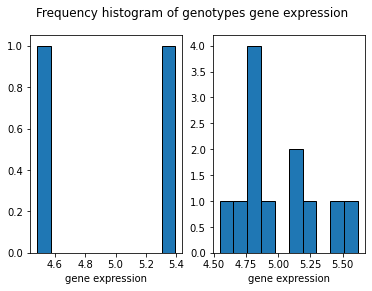

In [480]:
# # plot histogram
# import matplotlib.pyplot as plt
# fig, (ax1, ax2) = plt.subplots(1, 2)
# fig.suptitle('Frequency histogram of genotypes gene expression')
# ax1.hist(df_new[0], bins=10, histtype='bar', ec='k') 
# ax2.hist(df_new[2], bins=10, histtype='bar', ec='k') 
# ax1.set_xlabel("gene expression")
# ax2.set_xlabel("gene expression")
# plt.show()

In [481]:
# As the p value obtained from the Shapiro-Wilk test is  not significant (p > 0.05), we conclude that the data is normally distributed. 

In [47]:
### test for genotypes 0 and 1
pvalue= []

for i in range(0, len(gene_DEL_boundary_sample_rename_new)):
    DEL_boundary_genotype_all = DEL_boundary_genotype[DEL_boundary_genotype.loc[:,'INFO_ID'] == gene_DEL_boundary_sample_rename_new.loc[i,'INFO_ID']].iloc[:,8:35]
    genotypes_list = DEL_boundary_genotype_all.iloc[0].values.tolist()
    gene_expression_list = gene_DEL_boundary_sample_rename_new.iloc[i, 2:28].values.tolist()

    df = pd.DataFrame({'genotypes' : genotypes_list,
                   'gene_expression' : gene_expression_list})
    
    df_new = df.assign(expression=df.groupby('genotypes').cumcount()).pivot('expression','genotypes','gene_expression')
    
    try:
        U, p = mannwhitneyu(x=df_new[0].dropna().tolist(), y=df_new[1].dropna().tolist(), method="exact", alternative = 'two-sided')
        if p < 0.05:
            p = str(p) + '_sig'
        print (p)
        
    except KeyError:
        p = 'NA'
        print (p)
    
    pvalue.append(p)
    
gene_DEL_boundary_sample_rename_new['pvalue_0_1'] = pvalue

In [48]:
#gene_DEL_boundary_sample_rename_new

In [446]:
gene_DEL_boundary_sample_rename_new.to_csv('directory/gene_DEL_flank_boundary_26sample_genotype_pvalue_only01.bed', index = False, sep='\t', header=True)

In [ ]:
### working on insertion

In [51]:
### test for genotypes 0 and 1
pvalue= []

for i in range(0, len(gene_INS_boundary_sample_rename_new)):
    INS_boundary_genotype_all = INS_boundary_genotype[INS_boundary_genotype.loc[:,'INFO_ID'] == gene_INS_boundary_sample_rename_new.loc[i,'INFO_ID']].iloc[:,8:35]
    genotypes_list = INS_boundary_genotype_all.iloc[0].values.tolist()
    gene_expression_list = gene_INS_boundary_sample_rename_new.iloc[i, 2:28].values.tolist()

    df = pd.DataFrame({'genotypes' : genotypes_list,
                   'gene_expression' : gene_expression_list})
    
    df_new = df.assign(expression=df.groupby('genotypes').cumcount()).pivot('expression','genotypes','gene_expression')
    
    try:
        U, p = mannwhitneyu(x=df_new[0].dropna().tolist(), y=df_new[1].dropna().tolist(), method="exact", alternative = 'two-sided')
        if p < 0.05:
            p = str(p) + '_sig'
        print (p)
        
    except KeyError:
        p = 'NA'
        print (p)
    
    pvalue.append(p)
    
gene_INS_boundary_sample_rename_new['pvalue_0_1'] = pvalue

In [52]:
#gene_INS_boundary_sample_rename_new

In [456]:
gene_INS_boundary_sample_rename_new.to_csv('directory/gene_INS_flank_boundary_26sample_genotype_pvalue_only01.bed', index = False, sep='\t', header=True)

In [ ]:
## visualization of chr6-130293639-INS-295

In [318]:
#gene_DEL_boundary_sample_rename_new.iloc[191, :]
gene_INS_boundary_sample_rename_new.iloc[175, :]

gene                          TMEM200A
INFO_ID         chr6-130293639-INS-295
NA18534                       2.303405
NA18939                       2.650858
NA19036                       3.043825
NA19240                       3.450595
NA19650                       2.748188
NA19983                       2.839752
NA20509                       2.489334
NA20847                       3.862035
HG00096                       3.403879
HG00171                       3.061517
HG00514                       1.785698
HG00733                        3.29414
HG00864                       2.738436
HG01114                       3.239487
HG01505                        3.43963
HG01573                       3.268887
HG01596                       2.909499
HG02011                       3.410804
HG02018                       2.712212
HG02492                       2.924135
HG02587                       4.531084
HG03009                       3.361059
HG03065                       3.611612
HG03371                  

In [319]:
#gene_expression_list = gene_DEL_boundary_sample_rename_new.iloc[191, 2:28].values.tolist()
gene_expression_list = gene_INS_boundary_sample_rename_new.iloc[175, 2:28].values.tolist()

In [573]:
# DEL_boundary_genotype_gene = DEL_boundary_genotype[DEL_boundary_genotype.loc[:,'INFO_ID'] == gene_DEL_boundary_sample_rename_new.loc[191,'INFO_ID']]
# DEL_boundary_genotype_all = DEL_boundary_genotype[DEL_boundary_genotype.loc[:,'INFO_ID'] == gene_DEL_boundary_sample_rename_new.loc[191,'INFO_ID']].iloc[:,8:35]
#DEL_boundary_genotype_all

,CHROM,START_POS,END_POS,TYPE,LEN,FILTER,INFO_ID,FORMAT,NA18534,NA18939,...,HG01596,HG02011,HG02018,HG02492,HG02587,HG03009,HG03065,HG03371,HG03683,HG03732
560,chr8,644401,649414,DEL,5014,PASS,chr8-644401-DEL-5014,GT:GQ,0,1,...,1,0,1,1,0,1,0,1,1,1


In [324]:
INS_boundary_genotype[INS_boundary_genotype.loc[:,'INFO_ID'] == gene_INS_boundary_sample_rename_new.loc[175,'INFO_ID']]
#INS_boundary_genotype_all = INS_boundary_genotype[INS_boundary_genotype.loc[:,'INFO_ID'] == gene_INS_boundary_sample_rename_new.loc[175,'INFO_ID']].iloc[:,8:34]
#INS_boundary_genotype_all

,CHROM,START_POS,END_POS,TYPE,LEN,FILTER,INFO_ID,FORMAT,NA18534,NA18939,...,HG01596,HG02011,HG02018,HG02492,HG02587,HG03009,HG03065,HG03371,HG03683,HG03732
17165,chr6,130293639,130293640,INS,295,PASS,chr6-130293639-INS-295,GT:GQ,1,1,...,1,1,1,0,0,0,0,0,1,0


In [611]:
#genotypes_list = DEL_boundary_genotype_all.iloc[0].values.tolist()
genotypes_list = INS_boundary_genotype_all.iloc[0].values.tolist()
genotypes_list

In [613]:
df = pd.DataFrame({'genotypes' : genotypes_list,
                   'gene_expression' : gene_expression_list})
df_new = df.assign(expression=df.groupby('genotypes').cumcount()).pivot('expression','genotypes','gene_expression')

In [615]:
df_new

genotypes,0,1
expression,,
0,2.839752,2.303405
1,2.489334,2.650858
2,3.862035,3.043825
3,3.403879,3.450595
4,3.061517,2.748188
5,3.294140,1.785698
6,3.439630,2.738436
7,3.268887,3.239487
8,2.924135,2.909499


In [616]:
df_new.agg(["count", "min", "max", "median", "mean", "skew"])

,0,1
count,14.000000,12.000000
min,2.489334,1.505742
max,4.531084,3.450595
median,3.327599,2.743312
mean,3.352328,2.708229
skew,0.710080,-0.831686


Text(0.5, 1.0, 'ERICH1')

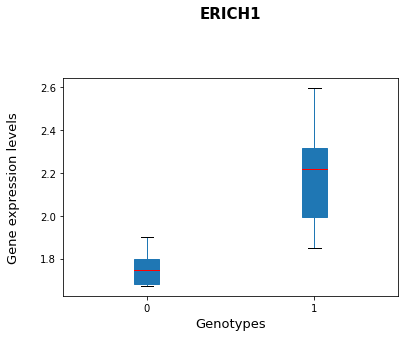

In [582]:
fig = df_new.boxplot(column=[0, 1], grid=False, patch_artist = True, medianprops=dict(color='red'))
fig.set_ylabel('Gene expression levels', fontsize = 13, labelpad=20)
fig.set_xlabel('Genotypes', fontsize=13)
fig.set_title('ERICH1', pad=60, fontsize = 15, fontweight = 'bold')

Text(0.5, 1.0, 'TMEM200A')

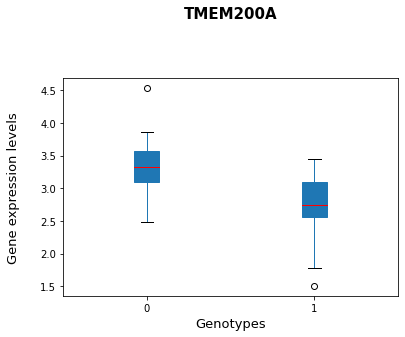

In [617]:
import matplotlib.pyplot as plt
fig = df_new.boxplot(column=[0, 1], grid=False, patch_artist = True, medianprops=dict(color='red'))
fig.set_ylabel('Gene expression levels', fontsize = 13, labelpad=20)
fig.set_xlabel('Genotypes', fontsize=13)
fig.set_title('TMEM200A', pad=60, fontsize = 15, fontweight = 'bold')

## SVs' impact on gene splicing levels

In [326]:
sqtl = pd.read_csv('directory/qtl_results_all_v2_fdr0.05.txt', sep = '\t')

In [327]:
sqtl

,feature_id,snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_group,feature_chromosome,feature_start,feature_end,...,alpha_param,beta_param,snp_chromosome,snp_position,call_rate,maf,hwe_p,QTL,type,length
0,1:111137586:111140038:clu_29294_-,chr1-111139496-SNV-C-T,3.577427e-140,-1.284696,0.050971,1.037982e-91,clu_29294_-,1,111137586,111140038,...,0.669126,2548.324431,1,111139496,1,0.269321,0.140600,chr1-111139496-SNV-C-T 1:111137586:111140038:c...,SNV,1
1,1:179884769:179889313:clu_14808_+,chr1-179889309-SNV-G-A,2.811204e-161,-1.289520,0.047652,2.679267e-90,clu_14808_+,1,179884769,179889313,...,0.567655,467.205146,1,179889309,1,0.420375,0.551334,chr1-179889309-SNV-G-A 1:179884769:179889313:c...,SNV,1
2,1:179884769:179889313:clu_14808_+,chr1-179894787-SNV-C-T,2.811204e-161,-1.289520,0.047652,2.679267e-90,clu_14808_+,1,179884769,179889313,...,0.567655,467.205146,1,179894787,1,0.420375,0.551334,chr1-179894787-SNV-C-T 1:179884769:179889313:c...,SNV,1
3,1:179884769:179889313:clu_14808_+,chr1-179894661-SNV-C-A,3.578690e-161,-1.278192,0.047249,3.072729e-90,clu_14808_+,1,179884769,179889313,...,0.567655,467.205146,1,179894661,1,0.421546,0.620074,chr1-179894661-SNV-C-A 1:179884769:179889313:c...,SNV,1
4,1:179884769:179889310:clu_14808_+,chr1-179889309-SNV-G-A,9.305331e-160,1.311239,0.048687,1.953264e-89,clu_14808_+,1,179884769,179889313,...,0.567655,467.205146,1,179889309,1,0.420375,0.551334,chr1-179889309-SNV-G-A 1:179884769:179889310:c...,SNV,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103867,22:49615490:49657405:clu_1083_-,chr22-49690615-SNV-T-C,2.036132e-07,-0.638678,0.122917,1.637443e-02,clu_1083_-,22,49416928,49657405,...,0.772518,21695.340000,22,49690615,1,0.077283,1.000000,chr22-49690615-SNV-T-C 22:49615490:49657405:cl...,SNV,1
1103868,22:49615490:49657405:clu_1083_-,chr22-49690616-SNV-G-A,2.036132e-07,-0.638678,0.122917,1.637443e-02,clu_1083_-,22,49416928,49657405,...,0.772518,21695.340000,22,49690616,1,0.077283,1.000000,chr22-49690616-SNV-G-A 22:49615490:49657405:cl...,SNV,1
1103869,22:39350109:39374329:clu_16335_+,chr22-39349634-SNV-G-A,1.263003e-06,-0.342603,0.070706,1.637489e-02,clu_16335_+,22,39350109,39374329,...,0.675804,1555.866000,22,39349634,1,0.444965,1.000000,chr22-39349634-SNV-G-A 22:39350109:39374329:cl...,SNV,1
1103870,22:49921761:49922294:clu_16464_+,chr22-49776204-SNV-G-A,1.296551e-06,0.474092,0.097947,1.641139e-02,clu_16464_+,22,49921761,49922612,...,0.764113,3209.649000,22,49776204,1,0.086651,1.000000,chr22-49776204-SNV-G-A 22:49921761:49922294:cl...,SNV,1


In [328]:
sqtl_DEL = sqtl[sqtl['type'] == 'DEL']
sqtl_INS = sqtl[sqtl['type'] == 'INS']

In [329]:
len(sqtl_DEL)

44945

In [330]:
len(sqtl_INS)

33950

In [331]:
sqtl['p_value'].max()

0.004527613

In [372]:
sqtl_DEL_boundary = sqtl[sqtl['snp_id'].isin(DEL_boundary_INFO_ID)]
sqtl_DEL_boundary_feature = list(sqtl_DEL_boundary['feature_id'])

In [373]:
sqtl_DEL_boundary

,feature_id,snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_group,feature_chromosome,feature_start,feature_end,...,alpha_param,beta_param,snp_chromosome,snp_position,call_rate,maf,hwe_p,QTL,type,length
841,1:212856996:212857766:clu_30033_-,chr1-212865885-DEL-169,2.555711e-75,0.961226,0.052343,6.922050e-49,clu_30033_-,1,212836187,212857766,...,0.675394,1665.816464,1,212865884,1,0.468384,0.001828,chr1-212865885-DEL-169 1:212856996:212857766:c...,DEL,169
1089,1:212857172:212857766:clu_30033_-,chr1-212865885-DEL-169,1.006103e-71,-0.955416,0.053349,1.855091e-46,clu_30033_-,1,212836187,212857766,...,0.675394,1665.816464,1,212865884,1,0.468384,0.001828,chr1-212865885-DEL-169 1:212857172:212857766:c...,DEL,169
1198,1:212856918:212857766:clu_30033_-,chr1-212865885-DEL-169,1.237719e-69,0.935380,0.053029,4.785481e-45,clu_30033_-,1,212836187,212857766,...,0.675394,1665.816464,1,212865884,1,0.468384,0.001828,chr1-212865885-DEL-169 1:212856918:212857766:c...,DEL,169
1523,1:212856921:212857766:clu_30033_-,chr1-212865885-DEL-169,1.063242e-66,0.918040,0.053211,4.587108e-43,clu_30033_-,1,212836187,212857766,...,0.675394,1665.816464,1,212865884,1,0.468384,0.001828,chr1-212865885-DEL-169 1:212856921:212857766:c...,DEL,169
3745,1:212854309:212857766:clu_30033_-,chr1-212865885-DEL-169,1.179435e-48,0.824945,0.056276,7.064096e-31,clu_30033_-,1,212836187,212857766,...,0.675394,1665.816464,1,212865884,1,0.468384,0.001828,chr1-212865885-DEL-169 1:212854309:212857766:c...,DEL,169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1079898,21:46442573:46445284:clu_9618_+,chr21-46237438-DEL-1322,6.830466e-08,0.300153,0.055630,1.329896e-03,clu_9618_+,21,46441084,46445398,...,0.779223,2702.057000,21,46237437,1,0.374707,0.148714,chr21-46237438-DEL-1322 21:46442573:46445284:c...,DEL,1322
1079997,21:46285394:46285803:clu_38361_-,chr21-46237438-DEL-1322,1.223988e-08,-0.350878,0.061597,1.455330e-03,clu_38361_-,21,46285394,46286151,...,0.603303,1345.970000,21,46237437,1,0.374707,0.148714,chr21-46237438-DEL-1322 21:46285394:46285803:c...,DEL,1322
1082180,21:29434369:29597570:clu_9429_+,chr21-29229496-DEL-340,7.277360e-08,-0.494945,0.091926,8.532518e-03,clu_9429_+,21,29329693,29597570,...,0.652337,7885.677000,21,29229495,1,0.121780,0.020130,chr21-29229496-DEL-340 21:29434369:29597570:cl...,DEL,340
1096626,22:29816073:29822335:clu_833_-,chr22-29818404-DEL-56,1.379702e-08,-0.346533,0.061054,2.183434e-04,clu_833_-,22,29816073,29822335,...,0.693426,331.273200,22,29818403,1,0.448478,0.240702,chr22-29818404-DEL-56 22:29816073:29822335:clu...,DEL,56


In [374]:
sqtl_INS_boundary = sqtl[sqtl['snp_id'].isin(INS_boundary_INFO_ID)]
sqtl_INS_boundary_feature = list(sqtl_INS_boundary['feature_id'])

In [375]:
sqtl_INS_boundary

,feature_id,snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_group,feature_chromosome,feature_start,feature_end,...,alpha_param,beta_param,snp_chromosome,snp_position,call_rate,maf,hwe_p,QTL,type,length
3739,1:209760324:209762515:clu_15055_+,chr1-209762731-INS-333,9.053865e-50,-0.933942,0.062967,6.845816e-31,clu_15055_+,1,209760324,209762515,...,0.650366,391.004246,1,209762730,1,0.364169,0.000157,chr1-209762731-INS-333 1:209760324:209762515:c...,INS,333
3820,1:209760384:209762515:clu_15055_+,chr1-209762731-INS-333,4.830923e-49,0.955423,0.064909,2.034083e-30,clu_15055_+,1,209760324,209762515,...,0.650366,391.004246,1,209762730,1,0.364169,0.000157,chr1-209762731-INS-333 1:209760384:209762515:c...,INS,333
3969,1:40040801:40041429:clu_13745_+,chr1-40059015-INS-307,1.241753e-45,1.208233,0.085215,1.598565e-29,clu_13745_+,1,40040783,40059337,...,0.695642,2820.883410,1,40059014,1,0.113583,0.809029,chr1-40059015-INS-307 1:40040801:40041429:clu_...,INS,307
5000,1:40041493:40059334:clu_13745_+,chr1-40059015-INS-307,2.209760e-41,1.119460,0.083080,1.446856e-26,clu_13745_+,1,40040783,40059337,...,0.695642,2820.883410,1,40059014,1,0.113583,0.809029,chr1-40059015-INS-307 1:40041493:40059334:clu_...,INS,307
7012,1:40041493:40059337:clu_13745_+,chr1-40059015-INS-307,9.669553e-35,1.097859,0.089295,6.028765e-22,clu_13745_+,1,40040783,40059337,...,0.695642,2820.883410,1,40059014,1,0.113583,0.809029,chr1-40059015-INS-307 1:40041493:40059337:clu_...,INS,307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080518,21:46367139:46385832:clu_9610_+,chr21-46228816-INS-72,1.179041e-07,-0.521235,0.098407,2.380302e-03,clu_9610_+,21,46367139,46385832,...,0.708046,1464.730000,21,46228815,1,0.104216,0.015204,chr21-46228816-INS-72 21:46367139:46385832:clu...,INS,72
1080589,21:46295098:46296162:clu_9604_+,chr21-46228816-INS-72,6.552416e-08,0.542578,0.100421,2.485310e-03,clu_9604_+,21,46286988,46296162,...,0.703112,2633.161000,21,46228815,1,0.104216,0.015204,chr21-46228816-INS-72 21:46295098:46296162:clu...,INS,72
1083430,22:45171152:45171600:clu_16418_+,chr22-45166719-INS-125,2.972476e-87,-1.261095,0.063691,6.826363e-62,clu_16418_+,22,45168246,45171600,...,0.734952,1781.177000,22,45166718,1,0.221311,0.261122,chr22-45166719-INS-125 22:45171152:45171600:cl...,INS,125
1083504,22:45171177:45171600:clu_16418_+,chr22-45166719-INS-125,1.368744e-66,1.140151,0.066140,1.048721e-46,clu_16418_+,22,45168246,45171600,...,0.734952,1781.177000,22,45166718,1,0.221311,0.261122,chr22-45166719-INS-125 22:45171177:45171600:cl...,INS,125


In [340]:
splicing_ratio = pd.read_csv('directory/LCL_perind.counts.qqnorm.CovariatesRemoved.cs.txt', sep='\t', header = 0, index_col=0)

In [341]:
splicing_ratio

,HG01505_GT20.08870_CTTGGTAT.CCAAGTCC_S13_L002,ERR188225,ERR188319,ERR188442,ERR188338,ERR188227,ERR188388,ERR188246,ERR188248,ERR188243,...,ERR188378,ERR188438,ERR188086,ERR188166,ERR188316,ERR188113,ERR188231,ERR188401,ERR188328,ERR188208
1:15947:16607:clu_28216_-,1.305044,1.393594,1.120643,1.454387,-0.734439,-0.950881,-0.166188,-1.531030,0.070317,0.538749,...,-0.215796,0.235676,0.805935,-0.476562,1.747705,-1.391309,-1.261412,0.273684,1.323672,0.153846
1:16310:16607:clu_28216_-,-0.802532,-1.736577,-0.795335,-1.764662,0.560568,1.152540,0.259199,1.306532,0.333197,-0.760520,...,0.578430,-0.355609,-1.129707,0.537739,-2.254430,1.121073,1.623199,0.216493,-1.581153,-0.340936
1:17055:17233:clu_28217_-,-1.479601,1.113143,1.005401,1.047445,0.666781,0.233550,0.971575,-0.639580,1.127355,-1.991327,...,1.047504,0.729925,0.030728,0.078015,0.359826,0.482407,0.035123,0.090868,0.446813,0.388141
1:17055:17606:clu_28217_-,1.312765,-0.030514,-1.444060,-1.029776,-0.740053,-0.292770,0.049098,-0.550698,-0.977998,1.968474,...,-0.979777,-0.930437,-1.012941,0.443829,0.310587,-1.079565,-0.826834,0.033047,1.510823,0.277269
1:17055:17915:clu_28217_-,2.305001,-0.867150,-0.862317,-0.078955,0.078869,-0.921706,0.564574,-0.061939,1.162044,-0.724917,...,0.091201,-0.818234,-1.414591,-0.038191,0.473560,-1.269791,-0.115176,-1.083777,0.452475,-0.705823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9:137782397:137790848:clu_18093_+,0.522056,1.415752,0.872317,0.178644,0.701933,1.777767,-1.736067,-1.674483,-0.310667,0.862084,...,0.488637,-1.168620,1.807166,-1.611161,0.158289,0.424960,-0.890559,0.347851,-1.629510,-1.405441
9:137790970:137792055:clu_18094_+,0.730951,-0.122214,-0.890275,-0.007186,-1.371613,-1.143209,-1.460725,-1.761141,1.319746,-0.345344,...,-0.656720,-0.385618,-1.922587,-1.782480,0.925073,1.098855,-0.737634,0.837171,-0.006964,0.907953
9:137790970:137798813:clu_18094_+,-0.828754,0.319232,0.521832,0.095080,0.981043,1.110182,1.247140,1.389771,-1.664995,0.476712,...,0.697371,0.530841,1.781770,1.351154,-0.697303,-1.333975,0.903652,-0.469929,0.069873,-1.287937
9:137800984:137802857:clu_18095_+,0.252568,0.193965,0.000805,-0.625663,-0.963092,0.881985,-1.969562,1.210591,1.771734,-0.246392,...,0.104182,-1.080589,-0.284014,-0.518766,-0.573151,1.720886,-0.580316,-0.310139,0.126217,-2.186904


In [376]:
splicing_DEL_boundary = splicing_ratio.filter(items = sqtl_DEL_boundary_feature, axis=0)

In [378]:
splicing_INS_boundary = splicing_ratio.filter(items = sqtl_INS_boundary_feature, axis=0)

In [380]:
sample = ['HG01114','HG03065','HG01505','HG02492','HG00096','HG03732','HG01573','NA20509','HG02587','HG01596','NA19983','HG00864','HG02011','HG00733','HG03371','NA19036','NA20847','HG00171','NA18534','NA18939','HG03683','NA19240','HG03009','HG02018','HG00514','NA19650']
splicing_DEL_boundary_sample = splicing_DEL_boundary.filter(regex='|'.join(sample), axis=1)
splicing_INS_boundary_sample = splicing_INS_boundary.filter(regex='|'.join(sample), axis=1)
## only keep the first 7 characters of the columns name
splicing_DEL_boundary_sample_rename = splicing_DEL_boundary_sample.rename(columns = lambda x : str(x)[:7])
splicing_INS_boundary_sample_rename = splicing_INS_boundary_sample.rename(columns = lambda x : str(x)[:7])

In [381]:
splicing_DEL_boundary_sample_rename_new = splicing_DEL_boundary_sample_rename.reset_index().rename(columns={'index': 'feature_id'})

In [382]:
splicing_DEL_boundary_sample_rename_new

,feature_id,HG01505,HG02018,HG00864,NA19036,HG00733,NA19240,HG01114,HG02011,HG03065,...,HG03009,HG03732,HG02492,HG00514,HG02587,HG01573,NA18534,HG00171,HG03683,NA18939
0,1:212856996:212857766:clu_30033_-,-0.398574,-0.422307,-0.453644,-0.407947,-0.068488,-0.136781,-0.339556,0.998201,0.238248,...,-0.305134,-0.549031,-0.186268,-0.067811,0.847136,1.363797,-0.379954,-0.412164,0.046793,-0.482347
1,1:212857172:212857766:clu_30033_-,0.964692,1.090088,1.312998,0.979292,-1.369907,1.079246,0.751866,-1.518220,-1.319015,...,0.942965,1.253626,-1.457726,1.055560,-1.570456,-1.190269,1.043213,0.877176,-1.253971,1.162674
2,1:212856918:212857766:clu_30033_-,-0.524202,-0.810533,-1.012896,-0.846717,1.271520,-0.542582,-0.411379,1.051304,0.637549,...,-0.515186,-0.625252,1.585839,-0.985064,0.549895,0.562437,-0.486887,-0.021293,0.090004,-0.590946
3,1:212856921:212857766:clu_30033_-,-0.643204,-0.957900,-0.914469,-0.662620,-0.216360,-0.706197,-0.462359,0.765595,0.405553,...,-0.259034,-0.746398,1.534683,-0.449425,1.821402,1.128407,-0.717488,-0.664255,-0.023794,-0.462139
4,1:212854309:212857766:clu_30033_-,-0.713800,-0.694678,-0.725045,-0.405330,0.568073,-0.866536,-0.063553,0.696259,0.729437,...,-0.607719,-0.961752,0.186378,-0.782692,0.140423,1.029577,-0.678931,-0.453190,2.984369,-0.627375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,21:46442573:46445284:clu_9618_+,-1.388613,0.742745,0.026842,-0.301351,-0.205632,0.046295,-0.489980,-0.583922,0.784579,...,-0.412053,-0.958738,0.539953,-0.934900,0.079658,-0.403761,0.943260,-0.190889,-0.086443,0.449333
536,21:46285394:46285803:clu_38361_-,0.832755,-0.053030,0.045878,0.009864,-0.071036,0.302086,-0.233855,0.090175,-0.307446,...,-0.337730,0.416324,0.285174,-0.150430,0.230767,0.005184,-0.530197,-0.067283,0.565432,-0.067908
537,21:29434369:29597570:clu_9429_+,-0.116262,0.027200,0.160603,-0.090593,-0.014720,-0.124749,-0.018340,0.128173,0.485596,...,-0.137723,0.018245,0.152015,-0.135999,0.088499,-0.290584,0.059925,0.266648,0.517322,0.642356
538,22:29816073:29822335:clu_833_-,1.082003,0.259365,-0.704524,0.279807,-0.792598,-0.067133,-1.130751,0.989318,1.029054,...,0.413682,-0.574896,0.162504,0.096277,-1.612470,-2.202263,0.876391,0.861384,-1.419155,1.110620


In [383]:
splicing_INS_boundary_sample_rename_new = splicing_INS_boundary_sample_rename.reset_index().rename(columns={'index': 'feature_id'})

In [384]:
splicing_INS_boundary_sample_rename_new

,feature_id,HG01505,HG02018,HG00864,NA19036,HG00733,NA19240,HG01114,HG02011,HG03065,...,HG03009,HG03732,HG02492,HG00514,HG02587,HG01573,NA18534,HG00171,HG03683,NA18939
0,1:209760324:209762515:clu_15055_+,0.015020,-1.442379,-0.609463,0.051001,-0.583510,0.422494,-0.771023,-0.927608,0.535539,...,0.342524,0.921725,0.908154,-1.563763,1.087867,0.382473,-0.589364,-0.037534,0.376201,-1.278180
1,1:209760384:209762515:clu_15055_+,0.117103,1.146378,0.734240,0.096192,0.610501,-0.313254,0.671546,0.997903,-0.409163,...,-0.179093,-1.211903,-1.146333,1.023160,-1.705574,-0.137895,0.772563,0.229249,-0.225493,1.128125
2,1:40040801:40041429:clu_13745_+,0.506750,-1.245359,0.368954,0.626138,0.656988,-0.178705,0.721875,0.370463,-0.463988,...,0.146110,1.011781,0.094034,0.016830,0.917442,-0.712661,-0.689828,-0.448639,-0.804290,-4.090391
3,1:40041493:40059334:clu_13745_+,0.065656,-1.172471,0.656595,0.402459,-0.283865,-0.000158,0.653535,1.054313,-0.891179,...,0.812330,1.043306,0.706166,0.380083,0.731472,-0.479773,-1.111080,0.175499,-1.178145,-4.783336
4,1:40041493:40059337:clu_13745_+,0.044509,-0.795541,0.196422,0.281160,0.295666,0.088002,0.245726,-0.253376,-0.549710,...,0.448370,1.376743,0.300902,-0.131351,0.944819,-1.024280,-1.061305,0.277907,0.153736,-4.499767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,21:46367139:46385832:clu_9610_+,-0.425166,1.647693,-0.169991,0.445602,-0.408199,-0.351494,-0.538221,-0.224429,0.979740,...,1.260196,-0.795493,-0.538716,-0.772050,-0.893341,-0.892197,-0.352224,0.981710,1.858457,0.723160
672,21:46295098:46296162:clu_9604_+,-0.427625,-0.615083,-0.624581,0.386742,0.038278,1.974020,-0.084345,-0.526649,1.483647,...,0.334658,-0.059161,-0.530774,0.988810,-0.746350,-0.114172,0.178621,-0.618883,-0.436026,-0.714946
673,22:45171152:45171600:clu_16418_+,-1.101511,0.163236,1.122087,-1.073997,-0.028077,0.298772,-1.078012,0.923304,-1.085933,...,0.296197,0.451719,0.964336,1.240152,1.073830,-0.863420,0.670943,-1.089862,0.421009,0.112200
674,22:45171177:45171600:clu_16418_+,0.922546,-0.354246,-1.500800,1.346198,-0.433203,-0.030764,0.903762,0.459733,0.906761,...,0.206101,0.010700,0.048779,-1.360179,0.291367,0.332461,-0.560864,1.142059,-0.618125,-0.099785


In [387]:
INFO_ID = list(sqtl_DEL_boundary.iloc[:, 1])
len(INFO_ID)

540

In [388]:
splicing_DEL_boundary_sample_rename_new['INFO_ID'] = INFO_ID 
splicing_DEL_boundary_sample_rename_new = splicing_DEL_boundary_sample_rename_new[[
'feature_id','INFO_ID', 'NA18534','NA18939','NA19036','NA19240','NA19650','NA19983','NA20509','NA20847','HG00096','HG00171','HG00514','HG00733','HG00864','HG01114','HG01505','HG01573','HG01596','HG02011','HG02018','HG02492','HG02587','HG03009','HG03065','HG03371','HG03683','HG03732'
    ]]

In [389]:
splicing_DEL_boundary_sample_rename_new

,feature_id,INFO_ID,NA18534,NA18939,NA19036,NA19240,NA19650,NA19983,NA20509,NA20847,...,HG01596,HG02011,HG02018,HG02492,HG02587,HG03009,HG03065,HG03371,HG03683,HG03732
0,1:212856996:212857766:clu_30033_-,chr1-212865885-DEL-169,-0.379954,-0.482347,-0.407947,-0.136781,-0.455290,-0.064905,0.163100,-0.509662,...,1.663440,0.998201,-0.422307,-0.186268,0.847136,-0.305134,0.238248,-0.453373,0.046793,-0.549031
1,1:212857172:212857766:clu_30033_-,chr1-212865885-DEL-169,1.043213,1.162674,0.979292,1.079246,1.039276,-0.921520,-1.541223,1.224434,...,-1.650310,-1.518220,1.090088,-1.457726,-1.570456,0.942965,-1.319015,1.250436,-1.253971,1.253626
2,1:212856918:212857766:clu_30033_-,chr1-212865885-DEL-169,-0.486887,-0.590946,-0.846717,-0.542582,-0.890016,0.444691,1.773205,-0.997720,...,1.238489,1.051304,-0.810533,1.585839,0.549895,-0.515186,0.637549,-0.894264,0.090004,-0.625252
3,1:212856921:212857766:clu_30033_-,chr1-212865885-DEL-169,-0.717488,-0.462139,-0.662620,-0.706197,-0.281594,0.251246,-0.535056,-0.869017,...,1.464868,0.765595,-0.957900,1.534683,1.821402,-0.259034,0.405553,-0.647578,-0.023794,-0.746398
4,1:212854309:212857766:clu_30033_-,chr1-212865885-DEL-169,-0.678931,-0.627375,-0.405330,-0.866536,-0.726154,1.157371,0.320011,-0.791798,...,0.666505,0.696259,-0.694678,0.186378,0.140423,-0.607719,0.729437,-0.667818,2.984369,-0.961752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,21:46442573:46445284:clu_9618_+,chr21-46237438-DEL-1322,0.943260,0.449333,-0.301351,0.046295,-0.480915,0.793730,-1.248494,0.627607,...,-1.105000,-0.583922,0.742745,0.539953,0.079658,-0.412053,0.784579,-1.215404,-0.086443,-0.958738
536,21:46285394:46285803:clu_38361_-,chr21-46237438-DEL-1322,-0.530197,-0.067908,0.009864,0.302086,0.306844,0.406688,0.958297,-0.753668,...,-0.547530,0.090175,-0.053030,0.285174,0.230767,-0.337730,-0.307446,-0.255781,0.565432,0.416324
537,21:29434369:29597570:clu_9429_+,chr21-29229496-DEL-340,0.059925,0.642356,-0.090593,-0.124749,0.058007,-0.010658,-0.026518,-0.094566,...,-0.092958,0.128173,0.027200,0.152015,0.088499,-0.137723,0.485596,-0.155554,0.517322,0.018245
538,22:29816073:29822335:clu_833_-,chr22-29818404-DEL-56,0.876391,1.110620,0.279807,-0.067133,0.666852,-0.044606,-0.582180,0.512425,...,1.129870,0.989318,0.259365,0.162504,-1.612470,0.413682,1.029054,-1.972372,-1.419155,-0.574896


In [391]:
splicing_DEL_boundary_sample_rename_new.to_csv('directory/splicing_DEL_boundary_26sample_rename_only01.bed', index = False, sep='\t', header=True)

In [392]:
INFO_ID = list(sqtl_INS_boundary.iloc[:, 1])
len(INFO_ID)

676

In [393]:
splicing_INS_boundary_sample_rename_new['INFO_ID'] = INFO_ID 
splicing_INS_boundary_sample_rename_new = splicing_INS_boundary_sample_rename_new[[
'feature_id','INFO_ID', 'NA18534','NA18939','NA19036','NA19240','NA19650','NA19983','NA20509','NA20847','HG00096','HG00171','HG00514','HG00733','HG00864','HG01114','HG01505','HG01573','HG01596','HG02011','HG02018','HG02492','HG02587','HG03009','HG03065','HG03371','HG03683','HG03732'
    ]]

In [394]:
splicing_INS_boundary_sample_rename_new

,feature_id,INFO_ID,NA18534,NA18939,NA19036,NA19240,NA19650,NA19983,NA20509,NA20847,...,HG01596,HG02011,HG02018,HG02492,HG02587,HG03009,HG03065,HG03371,HG03683,HG03732
0,1:209760324:209762515:clu_15055_+,chr1-209762731-INS-333,-0.589364,-1.278180,0.051001,0.422494,0.514573,1.339672,-0.130506,-0.690327,...,-0.236706,-0.927608,-1.442379,0.908154,1.087867,0.342524,0.535539,-0.267760,0.376201,0.921725
1,1:209760384:209762515:clu_15055_+,chr1-209762731-INS-333,0.772563,1.128125,0.096192,-0.313254,-0.397991,-2.064664,0.311918,0.767001,...,0.407194,0.997903,1.146378,-1.146333,-1.705574,-0.179093,-0.409163,0.458033,-0.225493,-1.211903
2,1:40040801:40041429:clu_13745_+,chr1-40059015-INS-307,-0.689828,-4.090391,0.626138,-0.178705,1.133742,-1.386517,0.971173,-1.154574,...,0.566694,0.370463,-1.245359,0.094034,0.917442,0.146110,-0.463988,0.787183,-0.804290,1.011781
3,1:40041493:40059334:clu_13745_+,chr1-40059015-INS-307,-1.111080,-4.783336,0.402459,-0.000158,1.155814,-0.974158,0.505427,-0.737630,...,0.583143,1.054313,-1.172471,0.706166,0.731472,0.812330,-0.891179,0.936782,-1.178145,1.043306
4,1:40041493:40059337:clu_13745_+,chr1-40059015-INS-307,-1.061305,-4.499767,0.281160,0.088002,0.797031,-1.443352,0.654078,-0.389657,...,0.602547,-0.253376,-0.795541,0.300902,0.944819,0.448370,-0.549710,0.676396,0.153736,1.376743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,21:46367139:46385832:clu_9610_+,chr21-46228816-INS-72,-0.352224,0.723160,0.445602,-0.351494,1.455854,-0.153178,-0.376385,-0.131939,...,0.404714,-0.224429,1.647693,-0.538716,-0.893341,1.260196,0.979740,0.249559,1.858457,-0.795493
672,21:46295098:46296162:clu_9604_+,chr21-46228816-INS-72,0.178621,-0.714946,0.386742,1.974020,-0.586641,0.465158,-0.462200,-0.383591,...,-0.000817,-0.526649,-0.615083,-0.530774,-0.746350,0.334658,1.483647,-0.657881,-0.436026,-0.059161
673,22:45171152:45171600:clu_16418_+,chr22-45166719-INS-125,0.670943,0.112200,-1.073997,0.298772,-0.998898,0.215100,-1.012480,-1.142979,...,1.454884,0.923304,0.163236,0.964336,1.073830,0.296197,-1.085933,-1.037014,0.421009,0.451719
674,22:45171177:45171600:clu_16418_+,chr22-45166719-INS-125,-0.560864,-0.099785,1.346198,-0.030764,1.504756,-0.479987,1.306756,0.721250,...,-1.415100,0.459733,-0.354246,0.048779,0.291367,0.206101,0.906761,1.129761,-0.618125,0.010700


In [395]:
splicing_INS_boundary_sample_rename_new.to_csv('directory/splicing_INS_boundary_26sample_rename_only01.bed', index = False, sep='\t', header=True)

In [53]:
### test for genotypes 0 and 1
pvalue= []
for i in range(0, len(splicing_DEL_boundary_sample_rename_new)):
    DEL_boundary_genotype_all = DEL_boundary_genotype[DEL_boundary_genotype.loc[:,'INFO_ID'] == splicing_DEL_boundary_sample_rename_new.loc[i,'INFO_ID']].iloc[:,8:35]
    genotypes_list = DEL_boundary_genotype_all.iloc[0].values.tolist()
    splicing_ratio_list = splicing_DEL_boundary_sample_rename_new.iloc[i, 2:28].values.tolist()

    df = pd.DataFrame({'genotypes' : genotypes_list,
                   'splicing_ratio' : splicing_ratio_list})
    
    df_new = df.assign(splicing=df.groupby('genotypes').cumcount()).pivot('splicing','genotypes','splicing_ratio')
    
    try:
        U, p = mannwhitneyu(x=df_new[0].dropna().tolist(), y=df_new[1].dropna().tolist(), method="exact", alternative = 'two-sided')
        if p < 0.05:
            p = str(p) + '_sig'
        print (p)
        
    except KeyError:
        p = 'NA'
        print (p)
    
    pvalue.append(p)
    
splicing_DEL_boundary_sample_rename_new['pvalue_0_1'] = pvalue

In [398]:
splicing_DEL_boundary_sample_rename_new.to_csv('directory/splicing_DEL_flank_boundary_26sample_genotype_pvalue_only01.bed', index = False, sep='\t', header=True)

In [54]:
### test for genotypes 0 and 1
pvalue= []
for i in range(0, len(splicing_INS_boundary_sample_rename_new)):
    INS_boundary_genotype_all = INS_boundary_genotype[INS_boundary_genotype.loc[:,'INFO_ID'] == splicing_INS_boundary_sample_rename_new.loc[i,'INFO_ID']].iloc[:,8:35]
    genotypes_list = INS_boundary_genotype_all.iloc[0].values.tolist()
    splicing_ratio_list = splicing_INS_boundary_sample_rename_new.iloc[i, 2:28].values.tolist()

    df = pd.DataFrame({'genotypes' : genotypes_list,
                   'splicing_ratio' : splicing_ratio_list})
    
    df_new = df.assign(splicing=df.groupby('genotypes').cumcount()).pivot('splicing','genotypes','splicing_ratio')
    
    try:
        U, p = mannwhitneyu(x=df_new[0].dropna().tolist(), y=df_new[1].dropna().tolist(), method="exact", alternative = 'two-sided')
        if p < 0.05:
            p = str(p) + '_sig'
        print (p)
        
    except KeyError:
        p = 'NA'
        print (p)
    
    pvalue.append(p)
    
splicing_INS_boundary_sample_rename_new['pvalue_0_1'] = pvalue

In [401]:
splicing_INS_boundary_sample_rename_new.to_csv('directory/splicing_INS_flank_boundary_26sample_genotype_pvalue_only01.bed', index = False, sep='\t', header=True)

In [643]:
#splicing_DEL_boundary_sample_rename_new.iloc[203, :]
splicing_INS_boundary_sample_rename_new.iloc[218, :]

feature_id    6:130385236:130439348:clu_24586_+
INFO_ID                  chr6-130293639-INS-295
NA18534                                0.267463
NA18939                                0.252313
NA19036                                0.004427
NA19240                               -0.021482
NA19650                                0.139053
NA19983                                -0.07158
NA20509                               -0.063894
NA20847                               -0.183647
HG00096                                0.343535
HG00171                               -0.107138
HG00514                                0.305549
HG00733                               -0.131516
HG00864                                0.016414
HG01114                               -0.045058
HG01505                                0.124082
HG01573                               -0.060614
HG01596                                0.430655
HG02011                                -0.01876
HG02018                                0

In [644]:
#gene_splicing_list = splicing_DEL_boundary_sample_rename_new.iloc[203, 2:28].values.tolist()
gene_splicing_list = splicing_INS_boundary_sample_rename_new.iloc[218, 2:28].values.tolist()
gene_splicing_list

[0.267462950298596,
 0.252313070795821,
 0.0044272301944602,
 -0.0214818224152996,
 0.13905316918287,
 -0.0715796362511352,
 -0.0638944125913783,
 -0.18364738163435,
 0.343534587044389,
 -0.107137795031301,
 0.305549126899973,
 -0.131515837079997,
 0.0164139923211265,
 -0.0450584268661352,
 0.124082356296816,
 -0.0606137199143327,
 0.430654791279323,
 -0.01875986613336,
 0.259925697124385,
 -0.221717879960806,
 -0.0187411879105023,
 0.209584743724658,
 0.0491971015001853,
 -0.0066315295650273,
 0.0725898159747129,
 -0.16354912110109]

In [632]:
DEL_boundary_genotype[DEL_boundary_genotype.loc[:,'INFO_ID'] == splicing_DEL_boundary_sample_rename_new.loc[203,'INFO_ID']]

,CHROM,START_POS,END_POS,TYPE,LEN,FILTER,INFO_ID,FORMAT,NA18534,NA18939,...,HG01596,HG02011,HG02018,HG02492,HG02587,HG03009,HG03065,HG03371,HG03683,HG03732
560,chr8,644401,649414,DEL,5014,PASS,chr8-644401-DEL-5014,GT:GQ,0,1,...,1,0,1,1,0,1,0,1,1,1


In [633]:
DEL_boundary_genotype_all = DEL_boundary_genotype[DEL_boundary_genotype.loc[:,'INFO_ID'] == splicing_DEL_boundary_sample_rename_new.loc[203,'INFO_ID']].iloc[:,8:35]

In [634]:
DEL_boundary_genotype_all

,NA18534,NA18939,NA19036,NA19240,NA19650,NA19983,NA20509,NA20847,HG00096,HG00171,...,HG01596,HG02011,HG02018,HG02492,HG02587,HG03009,HG03065,HG03371,HG03683,HG03732
560,0,1,0,1,1,1,1,1,1,1,...,1,0,1,1,0,1,0,1,1,1


In [645]:
INS_boundary_genotype[INS_boundary_genotype.loc[:,'INFO_ID'] == splicing_INS_boundary_sample_rename_new.loc[218,'INFO_ID']]

,CHROM,START_POS,END_POS,TYPE,LEN,FILTER,INFO_ID,FORMAT,NA18534,NA18939,...,HG01596,HG02011,HG02018,HG02492,HG02587,HG03009,HG03065,HG03371,HG03683,HG03732
570,chr6,130293639,130293933,INS,295,PASS,chr6-130293639-INS-295,GT:GQ,1,1,...,1,1,1,0,0,0,0,0,1,0


In [646]:
#genotypes_list = DEL_boundary_genotype_all.iloc[0].values.tolist()
genotypes_list = INS_boundary_genotype_all.iloc[0].values.tolist()

In [647]:
df = pd.DataFrame({'genotypes' : genotypes_list,
                   'gene_splicing' : gene_splicing_list})

In [648]:
df_new = df.assign(splicing=df.groupby('genotypes').cumcount()).pivot('splicing','genotypes','gene_splicing')

In [649]:
df_new

genotypes,0,1
splicing,,
0,-0.071580,0.267463
1,-0.063894,0.252313
2,-0.183647,0.004427
3,0.343535,-0.021482
4,-0.107138,0.139053
5,-0.131516,0.305549
6,0.124082,0.016414
7,-0.060614,-0.045058
8,-0.221718,0.430655


In [ ]:
df_new.agg(["count", "min", "max", "median", "mean", "skew"])

Text(0.5, 1.0, '8:640834:668598:clu_8652_- (ERICH1)')

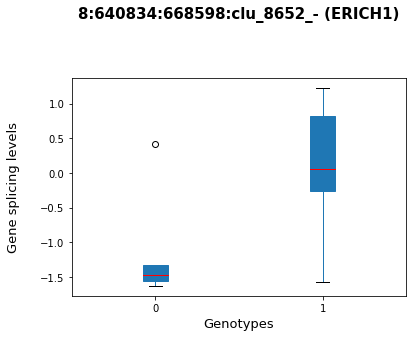

In [629]:
import matplotlib.pyplot as plt
fig = df_new.boxplot(column=[0, 1], grid=False, patch_artist = True, medianprops=dict(color='red'))
fig.set_ylabel('Gene splicing levels', fontsize = 13, labelpad=20)
fig.set_xlabel('Genotypes', fontsize=13)
fig.set_title('8:640834:668598:clu_8652_- (ERICH1)', pad=60, fontsize = 15, fontweight = 'bold')

Text(0.5, 1.0, '8:664676:668598:clu_8652_- (ERICH1)')

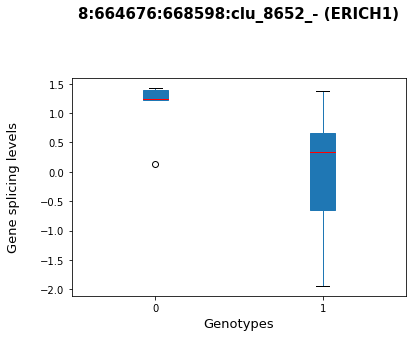

In [639]:
import matplotlib.pyplot as plt
fig = df_new.boxplot(column=[0, 1], grid=False, patch_artist = True, medianprops=dict(color='red'))
fig.set_ylabel('Gene splicing levels', fontsize = 13, labelpad=20)
fig.set_xlabel('Genotypes', fontsize=13)
fig.set_title('8:664676:668598:clu_8652_- (ERICH1)', pad=60, fontsize = 15, fontweight = 'bold')

Text(0.5, 1.0, '6:130385236:130439348:clu_24586_+ (TMEM200A)')

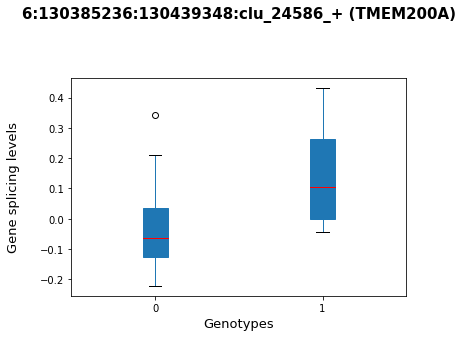

In [650]:
import matplotlib.pyplot as plt
fig = df_new.boxplot(column=[0, 1], grid=False, patch_artist = True, medianprops=dict(color='red'))
fig.set_ylabel('Gene splicing levels', fontsize = 13, labelpad=20)
fig.set_xlabel('Genotypes', fontsize=13)
fig.set_title('6:130385236:130439348:clu_24586_+ (TMEM200A)', pad=60, fontsize = 15, fontweight = 'bold')